In [4]:
from google.colab import files
uploaded = files.upload()


Saving text.csv to text (1).csv


In [5]:
# 🛠 התקנות
!pip uninstall -y scipy gensim
!pip install numpy==1.26.4
!pip install scipy==1.13.1 gensim==4.3.3 xgboost optuna wordcloud textblob seaborn

# 🧠 הורדת משאבים ל-NLTK
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# ✅ אישור שהכל עלה
import numpy
import scipy
import gensim
import xgboost

print("✅ numpy:", numpy.__version__)
print("✅ scipy:", scipy.__version__)
print("✅ gensim:", gensim.__version__)
print("✅ xgboost:", xgboost.__version__)



Found existing installation: scipy 1.13.1
Uninstalling scipy-1.13.1:
  Successfully uninstalled scipy-1.13.1
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ numpy: 1.26.4
✅ scipy: 1.13.1
✅ gensim: 4.3.3
✅ xgboost: 3.0.2


In [6]:
import pandas as pd

df = pd.read_csv("text.csv")
df.head()


,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [7]:
import gensim.downloader as api
from gensim.models import Word2Vec


In [8]:

# Data manipulation and analysis
import pandas as pd  # DataFrame operations
import numpy as np  # Numerical operations

# Data visualization
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization
from wordcloud import WordCloud, ImageColorGenerator  # Word cloud generation
from PIL import Image  # Image processing

# Text processing
import string  # String operations
from nltk.tokenize import word_tokenize  # Tokenizing text
from nltk.corpus import stopwords  # Common stop words
from nltk.stem import PorterStemmer  # Stemming words
import nltk  # Natural language toolkit
nltk.download('punkt')  # Download tokenizer data
nltk.download('stopwords')  # Download stop words data

# Text analysis
from textblob import TextBlob  # Text processing library
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # Text vectorization

# Data balancing
from sklearn.utils import resample  # Resampling data

# Data preparation
import optuna  # Hyperparameter tuning library
from sklearn.model_selection import train_test_split  # Splitting data
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV  # Hyperparameter tuning
from sklearn.model_selection import StratifiedKFold

# Word embeddings
import gensim.downloader as api  # Download pre-trained Word2Vec models
from gensim.models import Word2Vec  # Word2Vec model

# Machine learning models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier  # Ensemble models
from xgboost import XGBClassifier  # Extreme Gradient Boosting
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.svm import LinearSVC

from sklearn import metrics  # Evaluation metrics

from sklearn.dummy import DummyClassifier  # Dummy classifier
from sklearn.metrics import classification_report, confusion_matrix  # Evaluation metrics

from tensorflow.keras.preprocessing.text import Tokenizer  # Tokenization
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Padding sequences
from tensorflow.keras.utils import to_categorical  # One-hot encoding
import tensorflow as tf  # Deep learning library
from tensorflow.keras.models import Sequential  # Sequential model
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, BatchNormalization, SpatialDropout1D  # Layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Callbacks

# Utility
import warnings  # Warning control
warnings.filterwarnings('ignore')  # Ignore warnings
from collections import Counter  # Count occurrences of elements

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
## About the dataset

In [9]:
# Load dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  416809 non-null  int64 
 1   text        416809 non-null  object
 2   label       416809 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 9.5+ MB


In [10]:
df.describe()


,Unnamed: 0,label
count,416809.000000,416809.000000
mean,208404.000000,1.554271
std,120322.538513,1.490453
min,0.000000,0.000000
25%,104202.000000,0.000000
50%,208404.000000,1.000000
75%,312606.000000,3.000000
max,416808.000000,5.000000


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
def classes_plot(df):
  fig , ax = plt.subplots(figsize=(6,4))
  sns.countplot(x='label', data=df, color='cyan')
  plt.title("sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5)")
  plt.show()

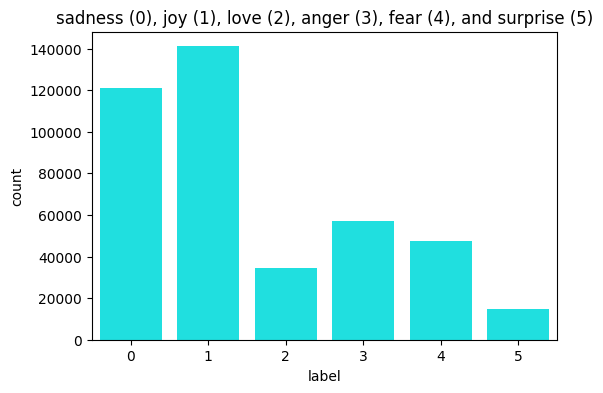

In [13]:
classes_plot(df)

# **As we can see the dataset is not balanced, so we use undersample technique to make the dataset balanced according to the smallest class (surprise)**

In [14]:
# Splitting the dataset to 3 different datasets as mentioned above
# Starting with the simple one - keeping the original dataset
original_df = df

In [15]:
from sklearn.utils import resample


Number of data for each class is: 7486


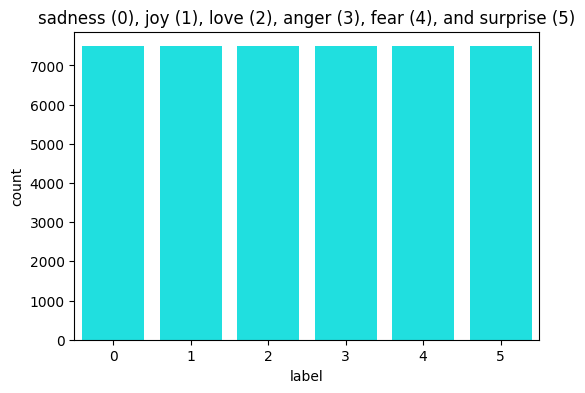

,Unnamed: 0,text,label
0,84526,i feel shaken up and torn down,4
1,227655,on reperbahn,3
2,339603,i feel insulted that he doesnt know me better ...,3
3,281246,i imagine that my fellow liberals get the same...,3
4,192230,i dont know why im writing it here and not tel...,3


In [16]:
# Now we will apply undersampling to the majority class to match class 5

# Separate the dataset by class
df_0 = df[df['label'] == 0]
df_1 = df[df['label'] == 1]
df_2 = df[df['label'] == 2]
df_3 = df[df['label'] == 3]
df_4 = df[df['label'] == 4]
df_5 = df[df['label'] == 5]

# Saving the amount of data in label 5
n_samples_label_5 = round(len(df_5) / 2)

# Downsample the majority classes to n_samples_label_5 samples
# The random_state variable act like a seed.
# Setting random_state=42 helps in making your code reproducible and ensures that the results are consistent across different runs.
df_0_downsampled = resample(df_0, replace=False, n_samples=n_samples_label_5, random_state=42)
df_1_downsampled = resample(df_1, replace=False, n_samples=n_samples_label_5, random_state=42)
df_2_downsampled = resample(df_2, replace=False, n_samples=n_samples_label_5, random_state=42)
df_3_downsampled = resample(df_3, replace=False, n_samples=n_samples_label_5, random_state=42)
df_4_downsampled = resample(df_4, replace=False, n_samples=n_samples_label_5, random_state=42)
df_5_downsampled = resample(df_5, replace=False, n_samples=n_samples_label_5, random_state=42)

# Combine the downsampled data with the minority class data along the y-axis
df_downsampled = pd.concat([df_1_downsampled, df_0_downsampled, df_3_downsampled, df_4_downsampled, df_2_downsampled, df_5_downsampled])

# Shuffle the combined dataset
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Number of data for each class is: {n_samples_label_5}")
classes_plot(df_downsampled)
df_downsampled.head()

In [17]:
def extract_href_sentence_lengths(df, text_column='text'):
    """
    Extracts the lengths of sentences that start with the words 'href', 'http' and 'www' in a given DataFrame column.

    Parameters:
    - df: DataFrame containing the data
    - text_column: Name of the column containing text data (default: 'text')

    Returns:
    - Lists of sentence lengths that start with 'href', 'http' and 'www'
    """
    href_sentence_lengths = []
    http_sentence_lengths = []
    www_sentence_lengths = []
    # Iterate through each text in the DataFrame
    for text in df[text_column]:
        # Split text into sentences based on common sentence delimiters
        sentences = text.split(' ')
        for sentence in sentences:
            if sentence.lower().startswith('href'):
                href_sentence_lengths.append(len(text))
            elif sentence.lower().startswith('http'):
                http_sentence_lengths.append(len(text))
            elif sentence.lower().startswith('www'):
                www_sentence_lengths.append(len(text))
    return href_sentence_lengths, http_sentence_lengths, www_sentence_lengths

In [18]:
def plot_text_length_distribution(df, df_name='DataFrame', text_column='text', label_column='label'):
    """
    Plots the distribution of text lengths by class.

    param: df: DataFrame containing the data
    param: df_name: Name of the DataFrame (default: 'DataFrame')
    param: text_column: Name of the column containing text data (default: 'text')
    param: label_column: Name of the column containing label data (default: 'label')
    """
    df['text_length'] = df[text_column].apply(len)
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df, x='text_length', hue=label_column, multiple='stack', bins=30)
    plt.title(f"Distribution of Text Lengths by Class for '{df_name}' dataset")
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.show()

In [19]:
def plot_word_clouds(df, df_name='DataFrame', text_column='text', label_column='label'):
    """
    Generates word clouds for each class.

    param: df: DataFrame containing the data
    param: df_name: Name of the DataFrame (default: 'DataFrame')
    param: text_column: Name of the column containing text data (default: 'text')
    param: label_column: Name of the column containing label data (default: 'label')
    """
    def plot_word_cloud(text, label):
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(9, 4))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"Word Cloud for Label {label} in '{df_name}' dataset")
        plt.axis('off')
        plt.show()

    for label in df[label_column].unique():
        text = ' '.join(df[df[label_column] == label][text_column])
        plot_word_cloud(text, label)

In [20]:
# Function to plot the most common words for each class
def plot_top_n_words(df, df_name='DataFrame', text_column='text', label_column='label', n=10):
    """
    Plots the top N most common words for each class.

    param: df: DataFrame containing the data
    param: df_name: Name of the DataFrame (default: 'DataFrame')
    param: text_column: Name of the column containing text data (default: 'text')
    param: label_column: Name of the column containing label data (default: 'label')
    param: n: Number of top words to plot (default: 10)
    """
    def plot_words(text, label, n):
        vec = CountVectorizer().fit(text)
        bag_of_words = vec.transform(text)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]
        words, freqs = zip(*words_freq)
        plt.figure(figsize=(10, 4))
        sns.barplot(x=freqs, y=words)
        plt.title(f"Top {n} Words for Label {label} in '{df_name}' dataset")
        plt.xlabel('Frequency')
        plt.ylabel('Word')
        plt.show()

    for label in df[label_column].unique():
        text = df[df[label_column] == label][text_column]
        plot_words(text, label, n)

In [21]:
# Function to plot the most common bigrams and trigrams for each class
def plot_ngrams(df, df_name='DataFrame', text_column='text', label_column='label', ngram_range=(2, 2), n=10):
    """
    Plots the most common n-grams (bigrams or trigrams) for each class.

    param: df: DataFrame containing the data
    param: df_name: Name of the DataFrame (default: 'DataFrame')
    param: text_column: Name of the column containing text data (default: 'text')
    param: label_column: Name of the column containing label data (default: 'label')
    param: ngram_range: Tuple specifying the n-gram range (default: (2, 2))
    param: n: Number of top n-grams to plot (default: 10)
    """
    def plot_ngrams_for_label(text, label, ngram_range, n):
        vec = CountVectorizer(ngram_range=ngram_range).fit(text)
        bag_of_words = vec.transform(text)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]
        words, freqs = zip(*words_freq)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=freqs, y=words)
        plt.title(f"Top {n} {'-'.join(map(str, ngram_range))}grams for Label {label} in '{df_name}' dataset")
        # plt.title(f'Top {n} {"-".join(map(str, ngram_range))}grams for Label {label}')
        plt.xlabel('Frequency')
        plt.ylabel('N-gram')
        plt.show()

    for label in df[label_column].unique():
        text = df[df[label_column] == label][text_column]
        plot_ngrams_for_label(text, label, ngram_range, n)


In [22]:
# Function to plot the sentiment polarity distribution by class
def plot_sentiment_distribution(df, df_name='DataFrame', text_column='text', label_column='label'):
    """
    Plots the distribution of sentiment polarity scores by class.

    param: df: DataFrame containing the data
    param: df_name: Name of the DataFrame (default: 'DataFrame')
    param: text_column: Name of the column containing text data (default: 'text')
    param: label_column: Name of the column containing label data (default: 'label')
    """
    df['sentiment'] = df[text_column].apply(lambda x: TextBlob(x).sentiment.polarity)
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=label_column, y='sentiment', data=df)
    plt.title(f"Sentiment Polarity Distribution by Class for '{df_name}' daaset")
    plt.xlabel('Label')
    plt.ylabel('Sentiment Polarity')
    plt.show()

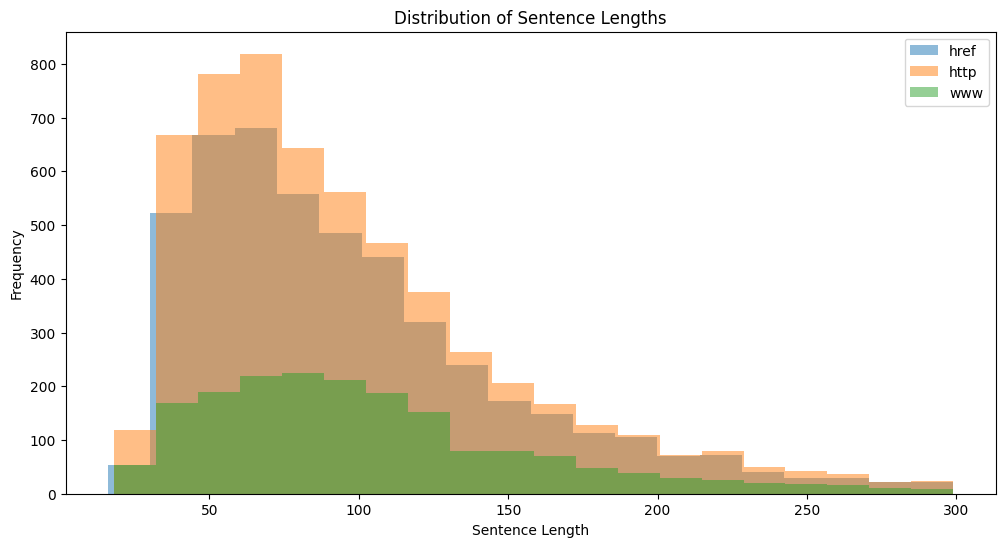

Number of sentences starting with 'href': 4789
Number of sentences starting with 'http': 5632
Number of sentences starting with 'www': 1855


In [23]:
# Extract lengths of sentences starting with 'href' and 'http' and 'www'
href_sentence_lengths, http_sentence_lengths, www_sentence_lengths = extract_href_sentence_lengths(df)
# plotting the distribution of each array

plt.figure(figsize=(12, 6))
plt.hist(href_sentence_lengths, bins=20, alpha=0.5, label='href')
plt.hist(http_sentence_lengths, bins=20, alpha=0.5, label='http')
plt.hist(www_sentence_lengths, bins=20, alpha=0.5, label='www')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Lengths')
plt.legend()
plt.show()
print(f"Number of sentences starting with 'href': {len(href_sentence_lengths)}")
print(f"Number of sentences starting with 'http': {len(http_sentence_lengths)}")
print(f"Number of sentences starting with 'www': {len(www_sentence_lengths)}")

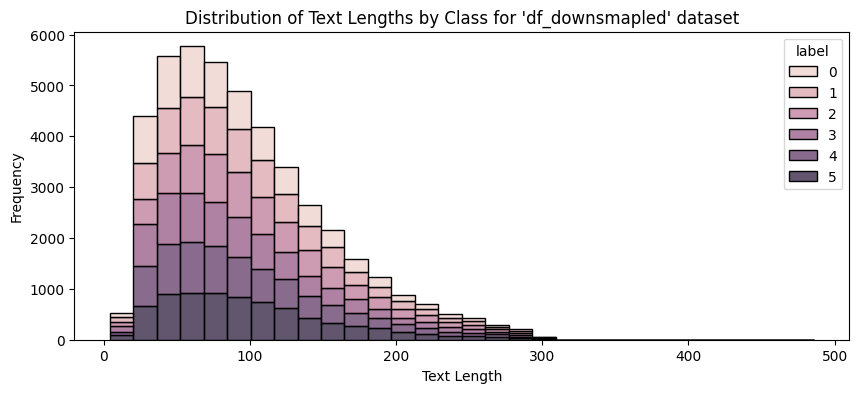

In [24]:
# Plotting te text length for both original_df and df_downsampled to see the difference
# plot_text_length_distribution(df=original_df, df_name='original_df')
plot_text_length_distribution(df_downsampled, df_name='df_downsmapled')

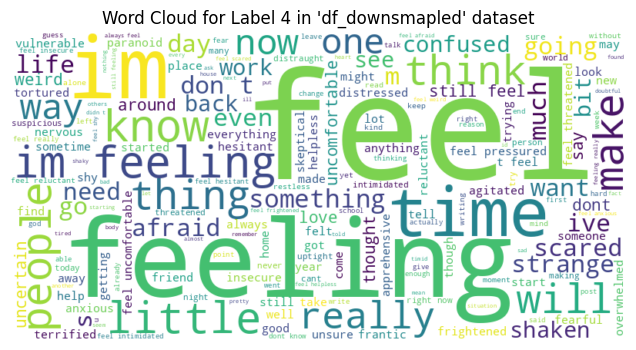

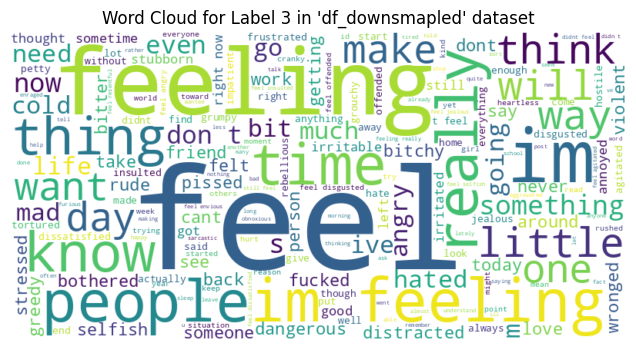

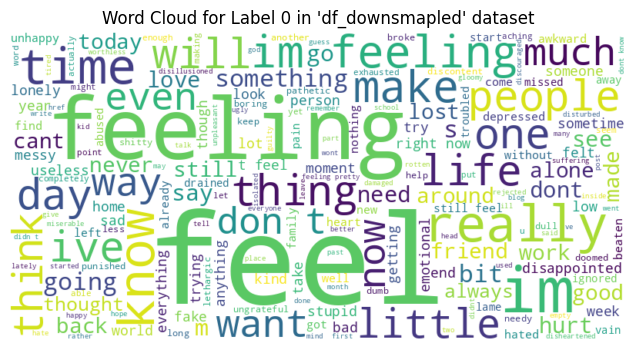

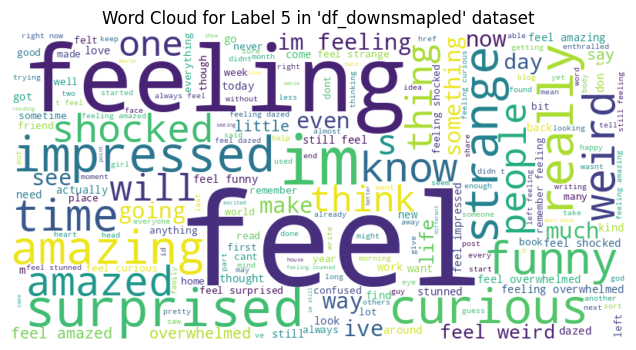

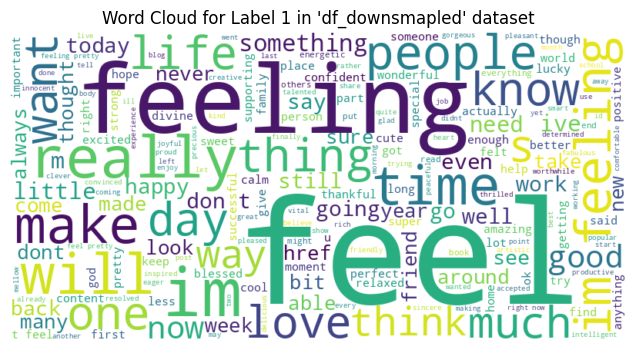

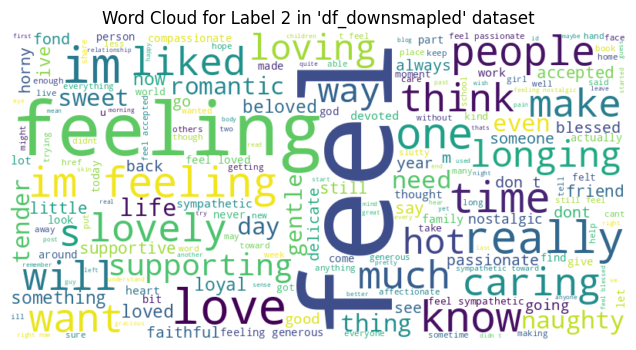

In [25]:
from wordcloud import WordCloud

plot_word_clouds(df=df_downsampled, df_name='df_downsmapled')
# plot_word_clouds(df=original_df, df_name='original_df')

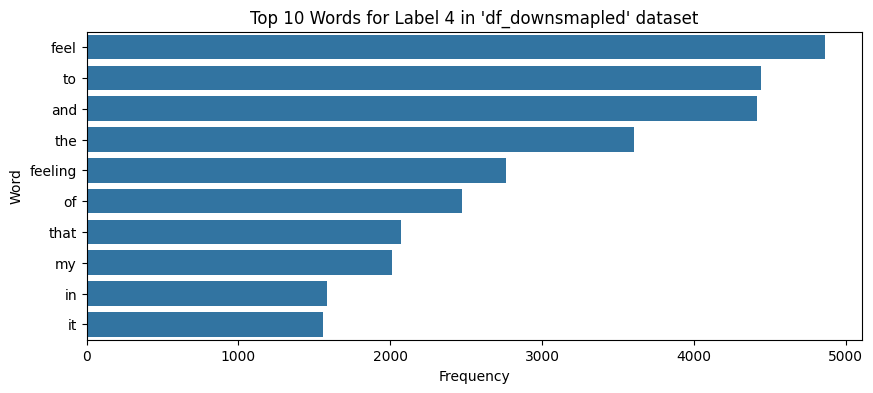

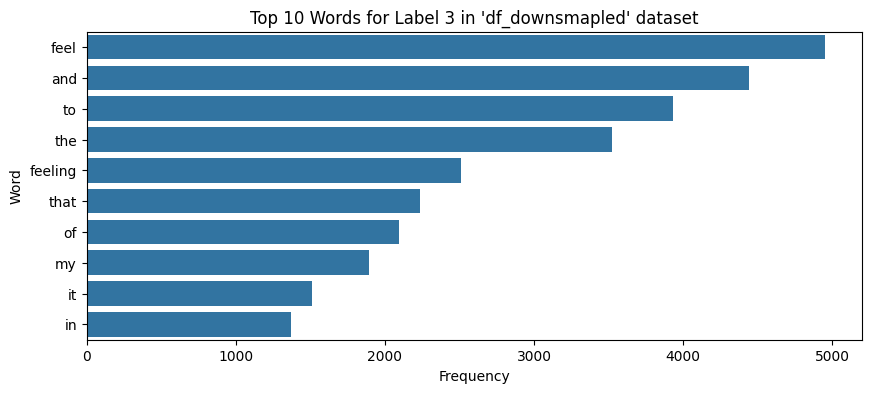

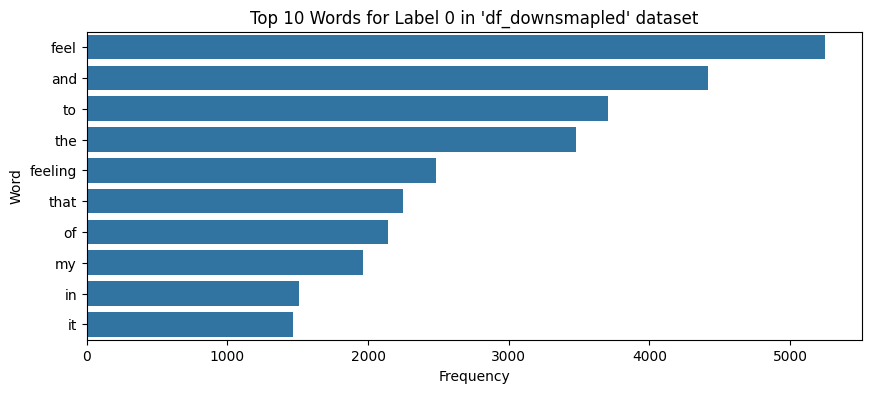

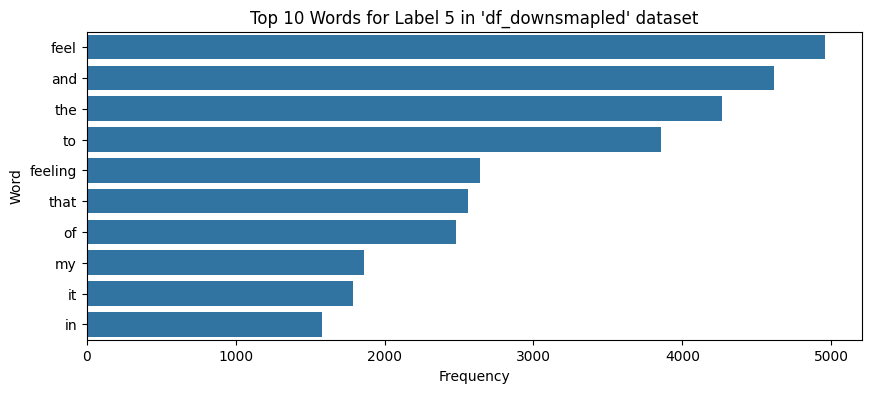

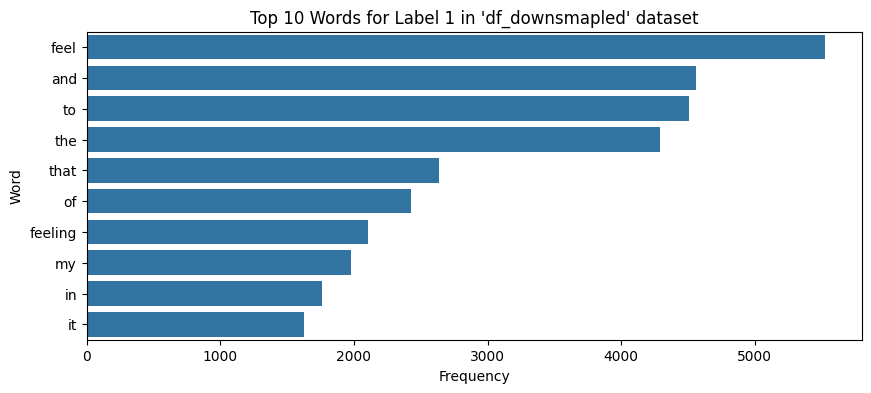

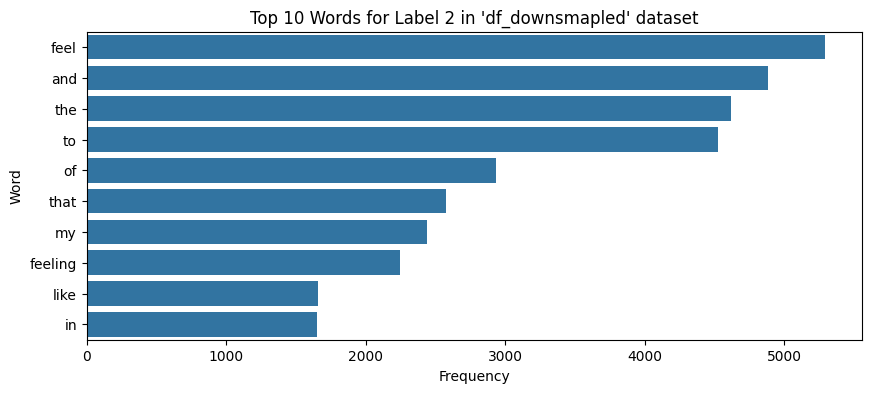

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

plot_top_n_words(df=df_downsampled, df_name='df_downsmapled')
# plot_top_n_words(df=original_df,  df_name='original_df')

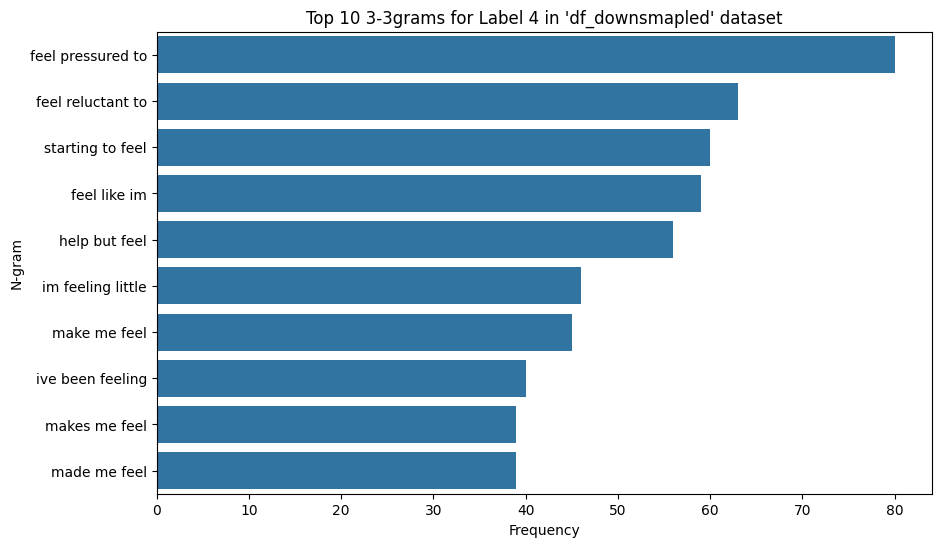

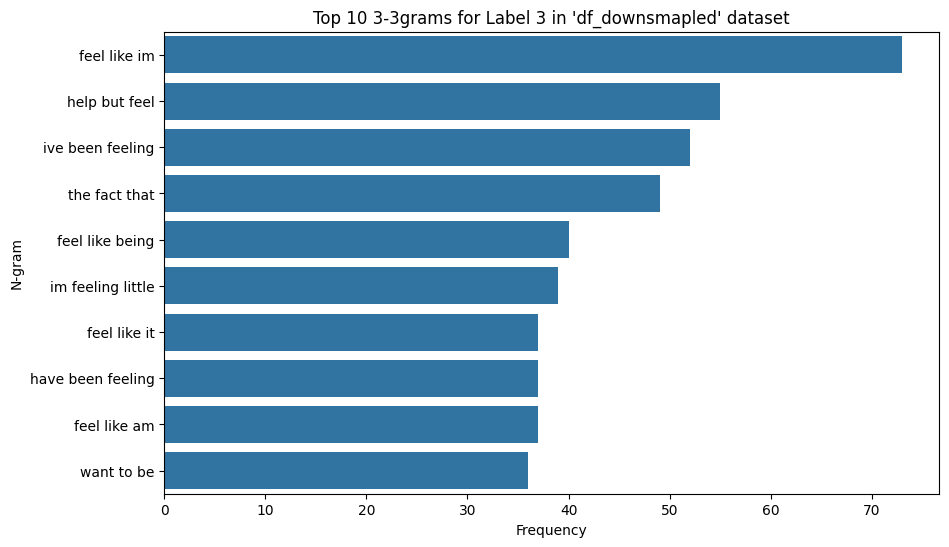

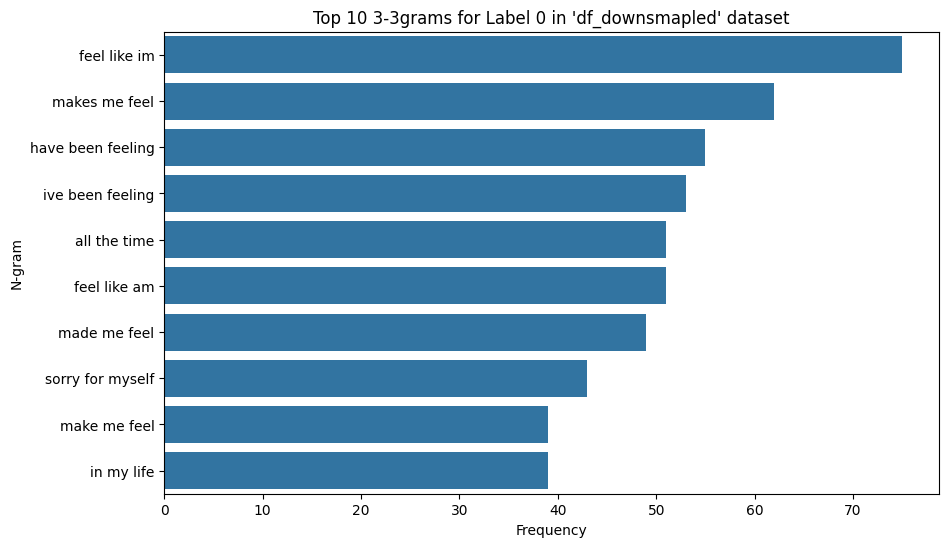

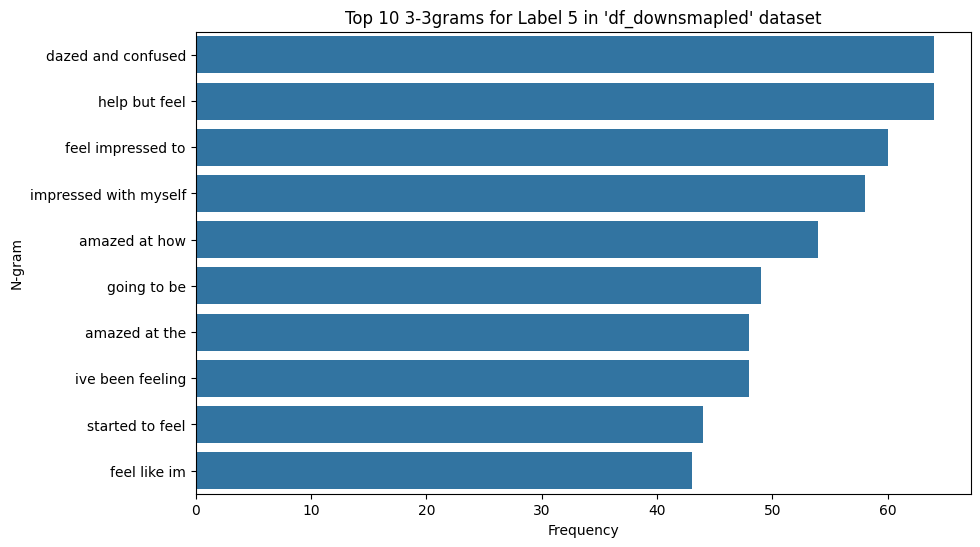

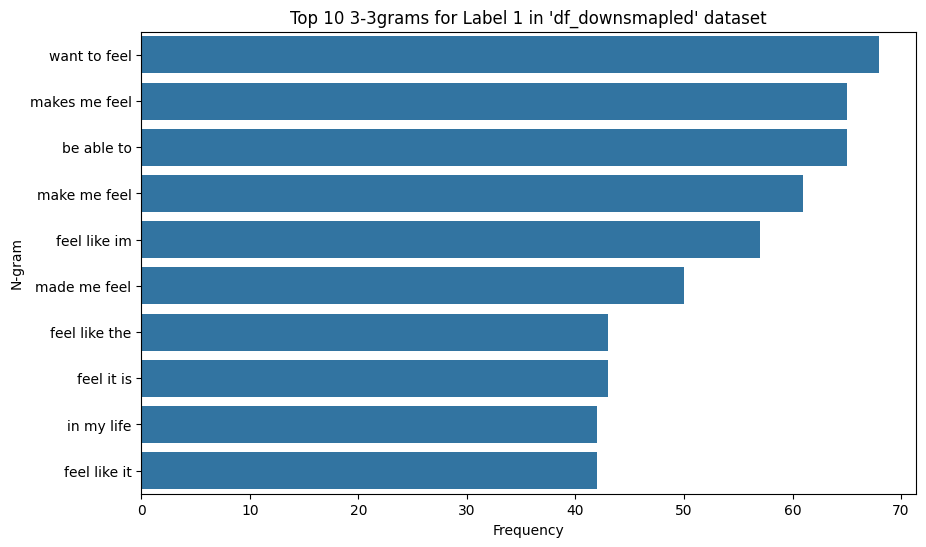

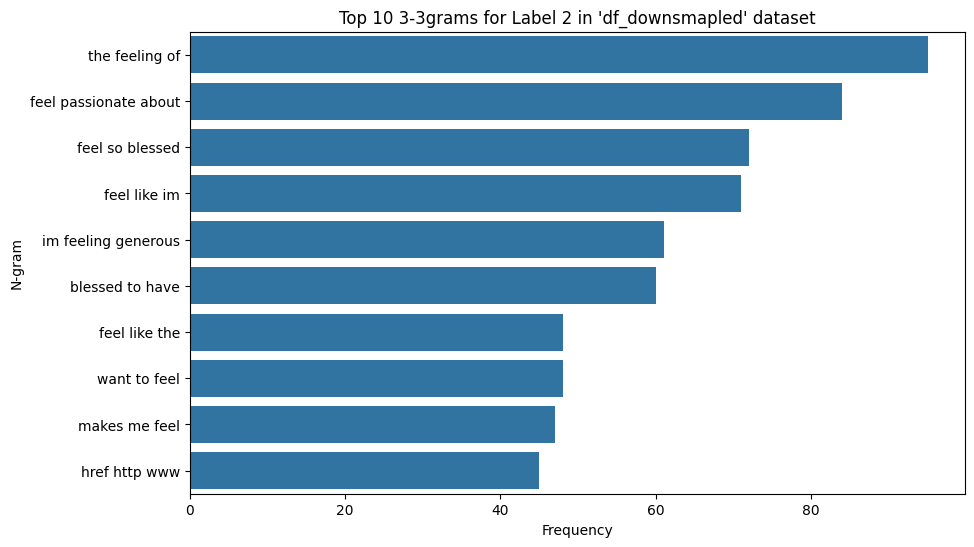

In [27]:
plot_ngrams(df=df_downsampled,  df_name='df_downsmapled', ngram_range=(3, 3))  # For trigrams
# plot_ngrams(df=original_df,  df_name='original_df', ngram_range=(3, 3))  # For trigrams

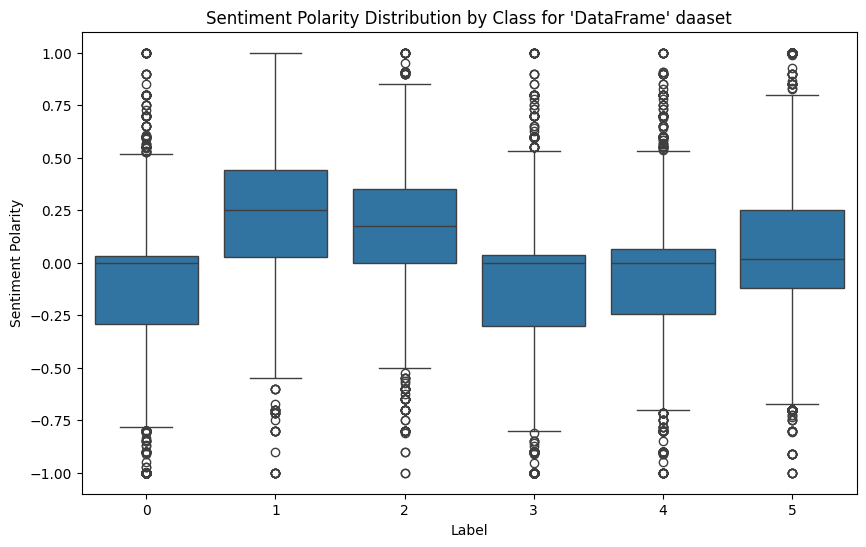

In [28]:
from textblob import TextBlob

plot_sentiment_distribution(df_downsampled) # Should discuss if it's important or not
# plot_sentiment_distribution(original_df) # Should discuss if it's important or not

<Axes: xlabel='sentiment', ylabel='Density'>

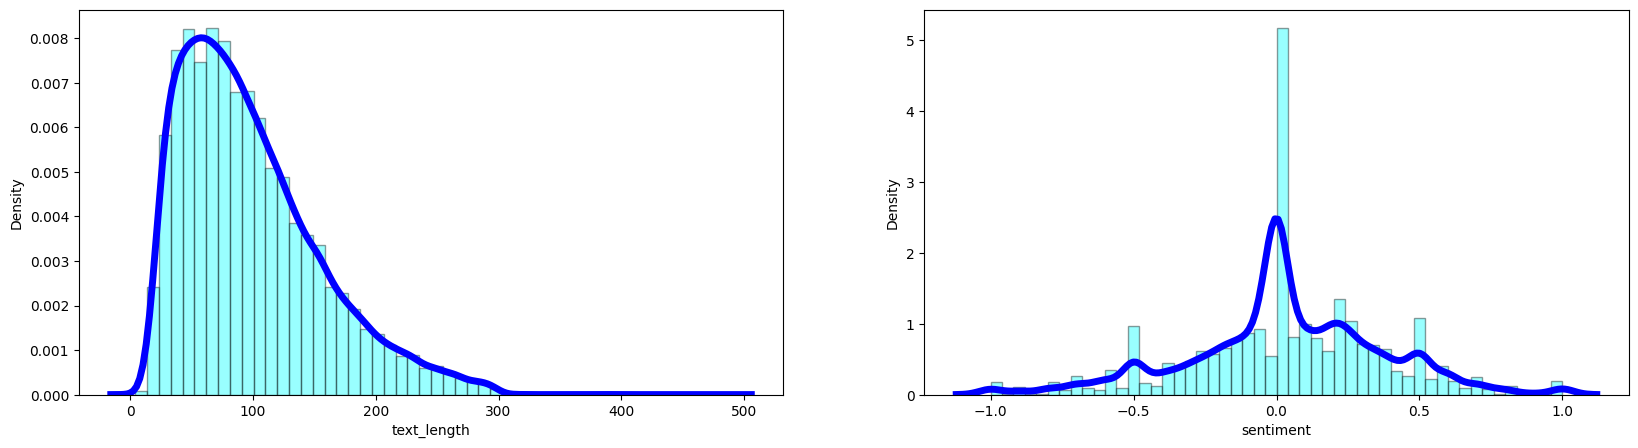

In [29]:
fig, axes = plt.subplots(1,2, figsize = (20,5))
sns.distplot(df_downsampled['text_length'], hist=True, kde=True,
             color = 'cyan',
             hist_kws={'edgecolor':'black'},
             kde_kws={'color': "b", 'linewidth': 5},
             ax = axes[0])

sns.distplot(df_downsampled['sentiment'], hist=True, kde=True,
             color = 'cyan',
             hist_kws={'edgecolor':'black'},
             kde_kws={'color': "b", 'linewidth': 5},
             ax = axes[1])


**Pre-proccessing in the text phase**




In the next few codes (functions), we will apply several techniques such as: Tokenization, Removing stop words, Stemming, Vectorization, and Embedding.

This applied to make the dataset simpler by splitting the words from each other, removing unneccessary words (that don't contribute to the whole sentence), stemming to convert the words to their base form, vectorization

In [30]:
## tokenization refers to breaking down a sentence into individual words.
def tokenize_text(df, text_column='text'):
    """
    Tokenizes the text data.

    param: df: DataFrame containing the data
    param: text_column: Name of the column containing text data (default: 'text')
    return: DataFrame with tokenized text
    type: (DataFrame, str) -> DataFrame
    """
    df['tokenized_text'] = df[text_column].apply(word_tokenize)
    return df


def remove_stop_words(df, text_column='tokenized_text'):
    """
    Removes stop words from the tokenized text.

    param: df: DataFrame containing the data
    param: text_column: Name of the column containing tokenized text data (default: 'tokenized_text')
    return: DataFrame with stop words removed
    type: (DataFrame, str) -> DataFrame
    """
    custom_stopwords = {"i","im","like", "feel", "feeling", "my", "the", "to", "still"
                        "for","know","littl","think","time","thing","would","go",
                        "really","feel","am","so","get", "one", "to", "and", "at", "can",
                        "day","way", "make", "me", "want", "could" , "would", "tri", "u", "href", "http", "www", "com", "https"
                        }
    stop_words = set(stopwords.words('english'))
    stop_words.update(custom_stopwords)
    df['text_no_stopwords'] = df[text_column].apply(lambda x: [word for word in x if word.lower() not in stop_words])
    return df

In [31]:
def apply_stemming(df, text_column='text_no_stopwords'):
    """
    Applies stemming to the text data.

    param: df: DataFrame containing the data
    param: text_column: Name of the column containing text data without stop words (default: 'text_no_stopwords')
    return: DataFrame with stemmed text
    type: (DataFrame, str) -> DataFrame
    """
    stemmer = PorterStemmer()
    df['stemmed_text'] = df[text_column].apply(lambda x: [stemmer.stem(word) for word in x])
    return df

In [32]:
def load_glove_vectors(glove_file):
    """
    Loads GloVe vectors from a file.

    param: glove_file: Path to the GloVe file
    return: Dictionary of word to vector mappings
    type: str -> dict
    """
    glove_model = {}
    with open(glove_file, 'r', encoding='utf8') as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array(split_line[1:], dtype=np.float64)
            glove_model[word] = embedding
    return glove_model


In [33]:
def get_glove_embeddings(df, glove_model, text_column='stemmed_text'):
    """
    Gets word embeddings using GloVe.

    param: df: DataFrame containing the data
    param: glove_model: Dictionary of GloVe vectors
    param: text_column: Name of the column containing stemmed text data (default: 'stemmed_text')
    return: DataFrame with word embeddings
    type: (DataFrame, dict, str) -> DataFrame
    """
    def embed_text(tokens):
        embedding_dim = len(next(iter(glove_model.values())))
        embeddings = [glove_model[word] for word in tokens if word in glove_model]
        if embeddings:
            return np.mean(embeddings, axis=0)
        else:
            return np.zeros(embedding_dim)

    df['text_embedding'] = df[text_column].apply(embed_text)
    return df


In [34]:
def preprocess_text_data(df, glove_model, text_column='text', label_column='label'):
    """
    Preprocesses text data through tokenization, stop word removal, stemming, and embedding.

    param: df: DataFrame containing the data
    param: glove_model: Dictionary of GloVe vectors
    param: text_column: Name of the column containing text data (default: 'text')
    param: label_column: Name of the column containing label data (default: 'label')
    return: Preprocessed DataFrame with embeddings
    type: (DataFrame, dict, str, str) -> DataFrame
    """
    df = tokenize_text(df, text_column)
    df = remove_stop_words(df)
    df = apply_stemming(df)
    df = get_glove_embeddings(df, glove_model)
    return df

In [35]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
# Load GloVe model
glove_file = "drive/MyDrive/kaggle_files/glove.6B.100d.txt"  # Path to the GloVe file
glove_model = load_glove_vectors(glove_file)

In [37]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
df_downsampled_preprocessed = preprocess_text_data(df_downsampled, glove_model)
# df_preprocessed = preprocess_text_data(original_df)
print(df_downsampled_preprocessed.head())

   Unnamed: 0                                               text  label  \
0       84526                     i feel shaken up and torn down      4   
1      227655                                       on reperbahn      3   
2      339603  i feel insulted that he doesnt know me better ...      3   
3      281246  i imagine that my fellow liberals get the same...      3   
4      192230  i dont know why im writing it here and not tel...      3   

   text_length  sentiment                                     tokenized_text  \
0           30  -0.155556             [i, feel, shaken, up, and, torn, down]   
1           12   0.000000                                    [on, reperbahn]   
2           55   0.500000  [i, feel, insulted, that, he, doesnt, know, me...   
3          150   0.183333  [i, imagine, that, my, fellow, liberals, get, ...   
4          131   0.000000  [i, dont, know, why, im, writing, it, here, an...   

                                   text_no_stopwords  \
0           

In [39]:
df_downsampled_preprocessed.head()

,Unnamed: 0,text,label,text_length,sentiment,tokenized_text,text_no_stopwords,stemmed_text,text_embedding
0,84526,i feel shaken up and torn down,4,30,-0.155556,"[i, feel, shaken, up, and, torn, down]","[shaken, torn]","[shaken, torn]","[-0.533135, 0.509355, 0.160105, -0.267755, -0...."
1,227655,on reperbahn,3,12,0.000000,"[on, reperbahn]",[reperbahn],[reperbahn],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,339603,i feel insulted that he doesnt know me better ...,3,55,0.500000,"[i, feel, insulted, that, he, doesnt, know, me...","[insulted, doesnt, better]","[insult, doesnt, better]","[-0.14870433333333333, 0.30715000000000003, 0...."
3,281246,i imagine that my fellow liberals get the same...,3,150,0.183333,"[i, imagine, that, my, fellow, liberals, get, ...","[imagine, fellow, liberals, warm, feelings, re...","[imagin, fellow, liber, warm, feel, read, mess...","[-0.20008642857142855, 0.3273742857142857, 0.1..."
4,192230,i dont know why im writing it here and not tel...,3,131,0.000000,"[i, dont, know, why, im, writing, it, here, an...","[dont, writing, telling, bet, theyre, totally,...","[dont, write, tell, bet, theyr, total, unawar,...","[-0.027195619999999997, 0.16288940000000002, 0..."


In [40]:
df_downsampled_preprocessed['sentence_stemmed_text'] = df_downsampled_preprocessed['stemmed_text'].apply(lambda x: ','.join(x))


In [41]:
df_downsampled_preprocessed.head()

,Unnamed: 0,text,label,text_length,sentiment,tokenized_text,text_no_stopwords,stemmed_text,text_embedding,sentence_stemmed_text
0,84526,i feel shaken up and torn down,4,30,-0.155556,"[i, feel, shaken, up, and, torn, down]","[shaken, torn]","[shaken, torn]","[-0.533135, 0.509355, 0.160105, -0.267755, -0....","shaken,torn"
1,227655,on reperbahn,3,12,0.000000,"[on, reperbahn]",[reperbahn],[reperbahn],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",reperbahn
2,339603,i feel insulted that he doesnt know me better ...,3,55,0.500000,"[i, feel, insulted, that, he, doesnt, know, me...","[insulted, doesnt, better]","[insult, doesnt, better]","[-0.14870433333333333, 0.30715000000000003, 0....","insult,doesnt,better"
3,281246,i imagine that my fellow liberals get the same...,3,150,0.183333,"[i, imagine, that, my, fellow, liberals, get, ...","[imagine, fellow, liberals, warm, feelings, re...","[imagin, fellow, liber, warm, feel, read, mess...","[-0.20008642857142855, 0.3273742857142857, 0.1...","imagin,fellow,liber,warm,feel,read,messag,cons..."
4,192230,i dont know why im writing it here and not tel...,3,131,0.000000,"[i, dont, know, why, im, writing, it, here, an...","[dont, writing, telling, bet, theyre, totally,...","[dont, write, tell, bet, theyr, total, unawar,...","[-0.027195619999999997, 0.16288940000000002, 0...","dont,write,tell,bet,theyr,total,unawar,dissatisfi"


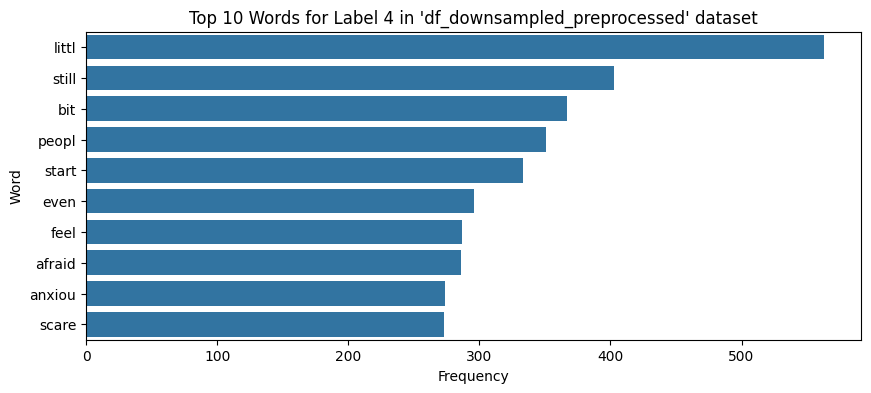

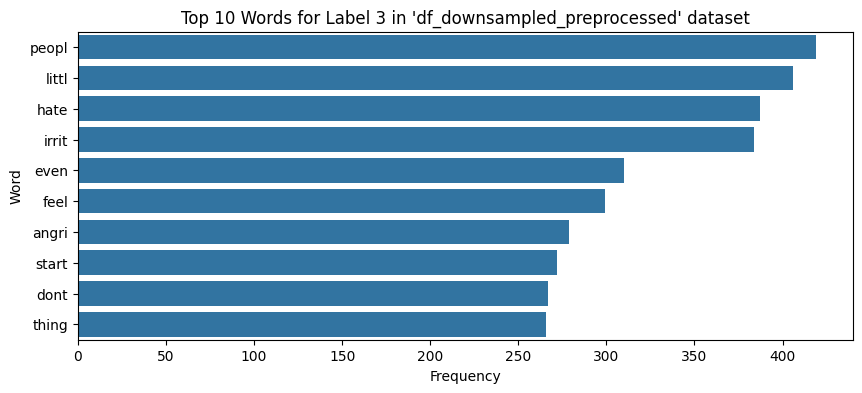

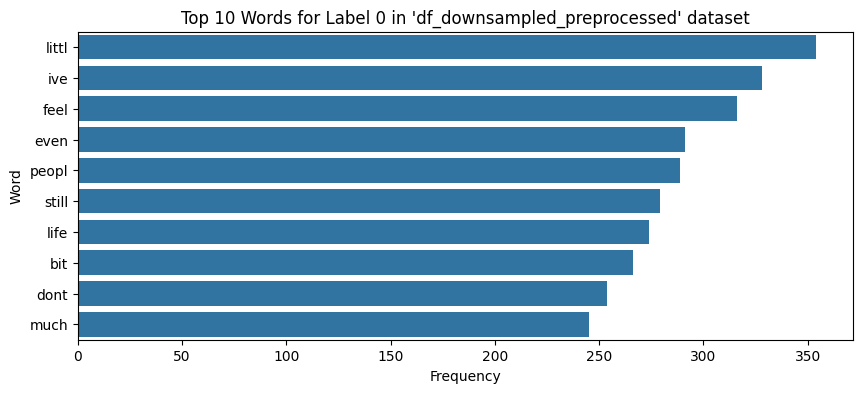

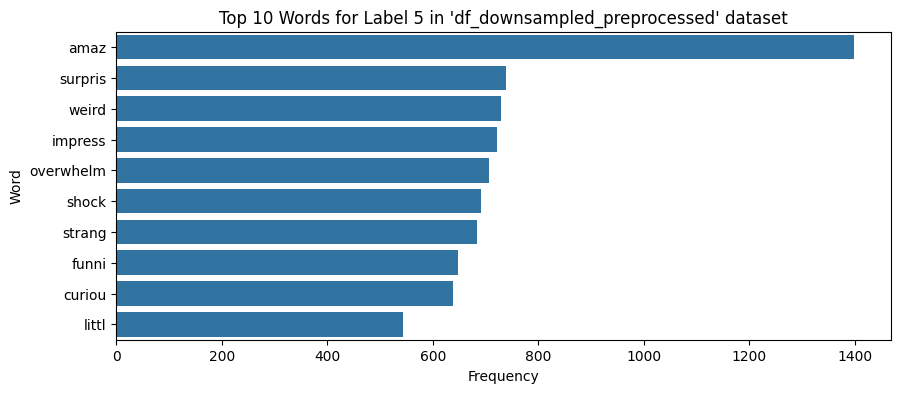

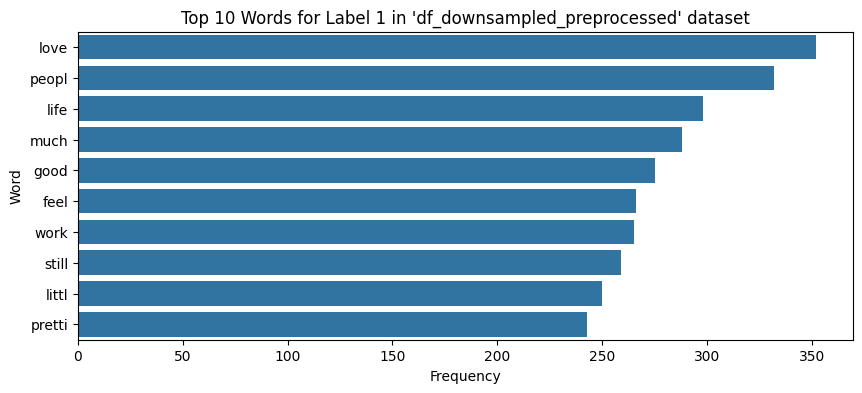

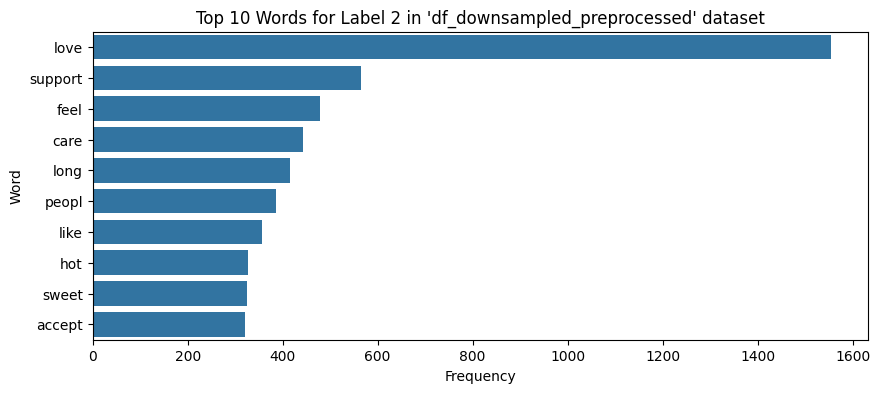

In [42]:
plot_top_n_words(df=df_downsampled_preprocessed, df_name='df_downsampled_preprocessed', text_column='sentence_stemmed_text')


<Axes: >

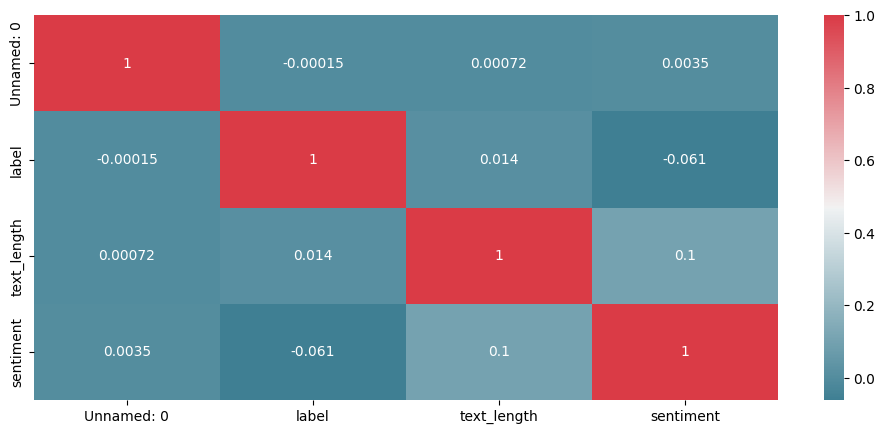

In [43]:
plt.subplots(figsize=(12,5))
df = df_downsampled_preprocessed.drop(['text', 'tokenized_text', 'text_no_stopwords', 'stemmed_text', 'text_embedding', 'sentence_stemmed_text'], axis=1)
corr = df.corr()
sns.heatmap(corr,annot = True, cmap=sns.diverging_palette(220, 10, as_cmap=True))

# Splitting data

In [44]:
def split_data(df, test_size=0.2, random_state=42):
  """
  Splits the dataset into training and testing sets.

  param: df: DataFrame containing the data
  param: test_size: Size of the testing set (default: 0.2)
  param: random_state: Random seed for reproducibility (default: 42)

  return: X_train, X_test, y_train, y_test
  """
  # Extract features and target
  # text_length = df['text_length'].values.reshape(-1, 1) tried to omit this column and found out that the results better without this column
  sentiment = df['sentiment'].values.reshape(-1, 1)
  X_embeddings = np.vstack(df['text_embedding'].values)

  # Concatenate features
  # X = np.hstack((text_length, sentiment, X_embeddings))
  X = np.hstack((sentiment, X_embeddings))

  # Extract target
  y = df['label'].values

  # Split to train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

  return X_train, X_test, y_train, y_test

In [45]:
# X_train_original, X_test_original, y_train_original, y_test_original = split_data(df=original_df, test_size=0.3)
X_train_downsampled, X_test_downsampled, y_train_downsampled, y_test_downsampled = split_data(df_downsampled_preprocessed)
print(f"Train set length for df_downsampled dataset is {X_train_downsampled.shape[0]}")
print(f"Test set length for df_downsampled dataset is {X_test_downsampled.shape[0]}")
# print(f"Train set length for original_df dataset is {X_train_original.shape[0]}")
# print(f"Test set length for original_df dataset is {X_test_original.shape[0]}")

Train set length for df_downsampled dataset is 35932
Test set length for df_downsampled dataset is 8984


# Training and tuning models

In [46]:
from sklearn.model_selection import train_test_split

X_knn, _, y_knn, _ = train_test_split(
    X_train_downsampled, y_train_downsampled,
    train_size=0.3, stratify=y_train_downsampled, random_state=42
)


In [47]:
def tune_hyperparameters(model_class, param_distributions, X, y, n_trials=20):

    from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
    import optuna, time

    X_small, _, y_small, _ = train_test_split(X, y, train_size=0.3, stratify=y, random_state=42)

    def objective(trial):
        params = {key: trial._suggest(key, dist) for key, dist in param_distributions.items()}
        model = model_class(**params)
        cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
        start = time.time()
        score = cross_val_score(model, X_small, y_small, cv=cv, scoring='accuracy').mean()
        print(f"Trial {trial.number} - time: {time.time() - start:.2f}s - score: {score:.4f} - params: {params}")
        return score

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=n_trials)

    return study.best_params, study.best_value


In [48]:
# Define hyperparameter space for KNeighborsClassifier
param_distributions_knn = {
    'n_neighbors': optuna.distributions.IntDistribution(1, 50),
    'weights': optuna.distributions.CategoricalDistribution(['uniform', 'distance']),
    'algorithm': optuna.distributions.CategoricalDistribution(['auto', 'ball_tree', 'kd_tree'])
}

best_params_knn, best_score_knn = tune_hyperparameters(KNeighborsClassifier, param_distributions_knn, X_train_downsampled, y_train_downsampled, n_trials=15)

print('Best hyperparameters for KNN: ', best_params_knn)
print('Best cross-validation score for KNN: ', best_score_knn)

[I 2025-07-27 13:37:02,105] A new study created in memory with name: no-name-d2954b4c-411c-4518-a531-5b99a53286a4
[I 2025-07-27 13:37:03,546] Trial 0 finished with value: 0.36561833194173854 and parameters: {'n_neighbors': 15, 'weights': 'distance', 'algorithm': 'auto'}. Best is trial 0 with value: 0.36561833194173854.


Trial 0 - time: 1.43s - score: 0.3656 - params: {'n_neighbors': 15, 'weights': 'distance', 'algorithm': 'auto'}


[I 2025-07-27 13:37:05,126] Trial 1 finished with value: 0.33973466926431023 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'auto'}. Best is trial 0 with value: 0.36561833194173854.


Trial 1 - time: 1.58s - score: 0.3397 - params: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'auto'}


[I 2025-07-27 13:37:33,857] Trial 2 finished with value: 0.3765655441135541 and parameters: {'n_neighbors': 46, 'weights': 'distance', 'algorithm': 'kd_tree'}. Best is trial 2 with value: 0.3765655441135541.


Trial 2 - time: 28.73s - score: 0.3766 - params: {'n_neighbors': 46, 'weights': 'distance', 'algorithm': 'kd_tree'}


[I 2025-07-27 13:37:56,695] Trial 3 finished with value: 0.3586603581037202 and parameters: {'n_neighbors': 10, 'weights': 'uniform', 'algorithm': 'kd_tree'}. Best is trial 2 with value: 0.3765655441135541.


Trial 3 - time: 22.84s - score: 0.3587 - params: {'n_neighbors': 10, 'weights': 'uniform', 'algorithm': 'kd_tree'}


[I 2025-07-27 13:37:57,736] Trial 4 finished with value: 0.3610724557008999 and parameters: {'n_neighbors': 14, 'weights': 'uniform', 'algorithm': 'auto'}. Best is trial 2 with value: 0.3765655441135541.


Trial 4 - time: 1.04s - score: 0.3611 - params: {'n_neighbors': 14, 'weights': 'uniform', 'algorithm': 'auto'}


[I 2025-07-27 13:38:20,653] Trial 5 finished with value: 0.3685870674459597 and parameters: {'n_neighbors': 32, 'weights': 'uniform', 'algorithm': 'kd_tree'}. Best is trial 2 with value: 0.3765655441135541.


Trial 5 - time: 22.91s - score: 0.3686 - params: {'n_neighbors': 32, 'weights': 'uniform', 'algorithm': 'kd_tree'}


[I 2025-07-27 13:38:21,603] Trial 6 finished with value: 0.3512385193431673 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'algorithm': 'auto'}. Best is trial 2 with value: 0.3765655441135541.


Trial 6 - time: 0.95s - score: 0.3512 - params: {'n_neighbors': 7, 'weights': 'distance', 'algorithm': 'auto'}


[I 2025-07-27 13:38:43,850] Trial 7 finished with value: 0.353650616940347 and parameters: {'n_neighbors': 9, 'weights': 'uniform', 'algorithm': 'kd_tree'}. Best is trial 2 with value: 0.3765655441135541.


Trial 7 - time: 22.24s - score: 0.3537 - params: {'n_neighbors': 9, 'weights': 'uniform', 'algorithm': 'kd_tree'}


[I 2025-07-27 13:38:59,232] Trial 8 finished with value: 0.3591242230262548 and parameters: {'n_neighbors': 10, 'weights': 'uniform', 'algorithm': 'ball_tree'}. Best is trial 2 with value: 0.3765655441135541.


Trial 8 - time: 15.37s - score: 0.3591 - params: {'n_neighbors': 10, 'weights': 'uniform', 'algorithm': 'ball_tree'}


[I 2025-07-27 13:39:00,194] Trial 9 finished with value: 0.37248353279525004 and parameters: {'n_neighbors': 25, 'weights': 'distance', 'algorithm': 'auto'}. Best is trial 2 with value: 0.3765655441135541.


Trial 9 - time: 0.96s - score: 0.3725 - params: {'n_neighbors': 25, 'weights': 'distance', 'algorithm': 'auto'}


[I 2025-07-27 13:39:15,681] Trial 10 finished with value: 0.37749327395862325 and parameters: {'n_neighbors': 50, 'weights': 'distance', 'algorithm': 'ball_tree'}. Best is trial 10 with value: 0.37749327395862325.


Trial 10 - time: 15.48s - score: 0.3775 - params: {'n_neighbors': 50, 'weights': 'distance', 'algorithm': 'ball_tree'}


[I 2025-07-27 13:39:30,983] Trial 11 finished with value: 0.37749327395862325 and parameters: {'n_neighbors': 50, 'weights': 'distance', 'algorithm': 'ball_tree'}. Best is trial 10 with value: 0.37749327395862325.


Trial 11 - time: 15.29s - score: 0.3775 - params: {'n_neighbors': 50, 'weights': 'distance', 'algorithm': 'ball_tree'}


[I 2025-07-27 13:39:46,727] Trial 12 finished with value: 0.37647277112904726 and parameters: {'n_neighbors': 49, 'weights': 'distance', 'algorithm': 'ball_tree'}. Best is trial 10 with value: 0.37749327395862325.


Trial 12 - time: 15.73s - score: 0.3765 - params: {'n_neighbors': 49, 'weights': 'distance', 'algorithm': 'ball_tree'}


[I 2025-07-27 13:40:02,741] Trial 13 finished with value: 0.3747100844234159 and parameters: {'n_neighbors': 40, 'weights': 'distance', 'algorithm': 'ball_tree'}. Best is trial 10 with value: 0.37749327395862325.


Trial 13 - time: 16.00s - score: 0.3747 - params: {'n_neighbors': 40, 'weights': 'distance', 'algorithm': 'ball_tree'}


[I 2025-07-27 13:40:18,212] Trial 14 finished with value: 0.3747100844234159 and parameters: {'n_neighbors': 40, 'weights': 'distance', 'algorithm': 'ball_tree'}. Best is trial 10 with value: 0.37749327395862325.


Trial 14 - time: 15.46s - score: 0.3747 - params: {'n_neighbors': 40, 'weights': 'distance', 'algorithm': 'ball_tree'}
Best hyperparameters for KNN:  {'n_neighbors': 50, 'weights': 'distance', 'algorithm': 'ball_tree'}
Best cross-validation score for KNN:  0.37749327395862325


In [49]:
# Use a subset of the data for faster hyperparameter tuning
X_small, _, y_small, _ = train_test_split(X_train_downsampled, y_train_downsampled, train_size=0.1, stratify=y_train_downsampled, random_state=42)


In [50]:
# Define hyperparameter space for RandomForestClassifier
param_distributions_rf = {
    'n_estimators': optuna.distributions.IntDistribution(30, 300, 10),
    'max_features': optuna.distributions.CategoricalDistribution(['sqrt', 'log2']),
    'max_depth': optuna.distributions.IntDistribution(2, 20),
    'min_samples_split': optuna.distributions.IntDistribution(2, 14),
    "min_samples_leaf": optuna.distributions.IntDistribution(1, 10)
}

best_params_rf, best_score_rf = tune_hyperparameters(RandomForestClassifier, param_distributions_rf, X_small, y_small, n_trials=15)

print('Best hyperparameters for Random Forest: ', best_params_rf)
print('Best cross-validation score for Random Forest: ', best_score_rf)

[I 2025-07-27 13:40:18,268] A new study created in memory with name: no-name-3f7f37a6-76d0-466a-9599-42c3d26d621b
[I 2025-07-27 13:40:18,970] Trial 0 finished with value: 0.28690807799442897 and parameters: {'n_estimators': 32, 'max_features': 'sqrt', 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.28690807799442897.


Trial 0 - time: 0.70s - score: 0.2869 - params: {'n_estimators': 32, 'max_features': 'sqrt', 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 5}


[I 2025-07-27 13:40:20,444] Trial 1 finished with value: 0.31476323119777155 and parameters: {'n_estimators': 67, 'max_features': 'sqrt', 'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.31476323119777155.


Trial 1 - time: 1.47s - score: 0.3148 - params: {'n_estimators': 67, 'max_features': 'sqrt', 'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 4}


[I 2025-07-27 13:40:21,141] Trial 2 finished with value: 0.28969359331476324 and parameters: {'n_estimators': 44, 'max_features': 'log2', 'max_depth': 15, 'min_samples_split': 12, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.31476323119777155.


Trial 2 - time: 0.69s - score: 0.2897 - params: {'n_estimators': 44, 'max_features': 'log2', 'max_depth': 15, 'min_samples_split': 12, 'min_samples_leaf': 5}


[I 2025-07-27 13:40:23,500] Trial 3 finished with value: 0.3212627669452182 and parameters: {'n_estimators': 168, 'max_features': 'sqrt', 'max_depth': 4, 'min_samples_split': 11, 'min_samples_leaf': 10}. Best is trial 3 with value: 0.3212627669452182.


Trial 3 - time: 2.36s - score: 0.3213 - params: {'n_estimators': 168, 'max_features': 'sqrt', 'max_depth': 4, 'min_samples_split': 11, 'min_samples_leaf': 10}


[I 2025-07-27 13:40:24,080] Trial 4 finished with value: 0.2850510677808728 and parameters: {'n_estimators': 43, 'max_features': 'log2', 'max_depth': 7, 'min_samples_split': 14, 'min_samples_leaf': 8}. Best is trial 3 with value: 0.3212627669452182.


Trial 4 - time: 0.58s - score: 0.2851 - params: {'n_estimators': 43, 'max_features': 'log2', 'max_depth': 7, 'min_samples_split': 14, 'min_samples_leaf': 8}


[I 2025-07-27 13:40:26,893] Trial 5 finished with value: 0.32590529247910865 and parameters: {'n_estimators': 132, 'max_features': 'sqrt', 'max_depth': 20, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 5 with value: 0.32590529247910865.


Trial 5 - time: 2.81s - score: 0.3259 - params: {'n_estimators': 132, 'max_features': 'sqrt', 'max_depth': 20, 'min_samples_split': 7, 'min_samples_leaf': 5}


[I 2025-07-27 13:40:27,809] Trial 6 finished with value: 0.2841225626740947 and parameters: {'n_estimators': 89, 'max_features': 'log2', 'max_depth': 4, 'min_samples_split': 13, 'min_samples_leaf': 10}. Best is trial 5 with value: 0.32590529247910865.


Trial 6 - time: 0.91s - score: 0.2841 - params: {'n_estimators': 89, 'max_features': 'log2', 'max_depth': 4, 'min_samples_split': 13, 'min_samples_leaf': 10}


[I 2025-07-27 13:40:30,526] Trial 7 finished with value: 0.32219127205199627 and parameters: {'n_estimators': 131, 'max_features': 'log2', 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 5 with value: 0.32590529247910865.


Trial 7 - time: 2.71s - score: 0.3222 - params: {'n_estimators': 131, 'max_features': 'log2', 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 4}


[I 2025-07-27 13:40:32,635] Trial 8 finished with value: 0.29526462395543174 and parameters: {'n_estimators': 69, 'max_features': 'sqrt', 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 5 with value: 0.32590529247910865.


Trial 8 - time: 2.10s - score: 0.2953 - params: {'n_estimators': 69, 'max_features': 'sqrt', 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 1}


[I 2025-07-27 13:40:33,405] Trial 9 finished with value: 0.308263695450325 and parameters: {'n_estimators': 50, 'max_features': 'log2', 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 5 with value: 0.32590529247910865.


Trial 9 - time: 0.77s - score: 0.3083 - params: {'n_estimators': 50, 'max_features': 'log2', 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 5}


[I 2025-07-27 13:40:40,592] Trial 10 finished with value: 0.33704735376044564 and parameters: {'n_estimators': 300, 'max_features': 'sqrt', 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 10 with value: 0.33704735376044564.


Trial 10 - time: 7.16s - score: 0.3370 - params: {'n_estimators': 300, 'max_features': 'sqrt', 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 1}


[I 2025-07-27 13:40:48,767] Trial 11 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 297, 'max_features': 'sqrt', 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 10 with value: 0.33704735376044564.


Trial 11 - time: 8.15s - score: 0.3333 - params: {'n_estimators': 297, 'max_features': 'sqrt', 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 1}


[I 2025-07-27 13:40:55,622] Trial 12 finished with value: 0.32590529247910865 and parameters: {'n_estimators': 288, 'max_features': 'sqrt', 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 10 with value: 0.33704735376044564.


Trial 12 - time: 6.83s - score: 0.3259 - params: {'n_estimators': 288, 'max_features': 'sqrt', 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 1}


[I 2025-07-27 13:41:03,513] Trial 13 finished with value: 0.329619312906221 and parameters: {'n_estimators': 288, 'max_features': 'sqrt', 'max_depth': 18, 'min_samples_split': 9, 'min_samples_leaf': 2}. Best is trial 10 with value: 0.33704735376044564.


Trial 13 - time: 7.86s - score: 0.3296 - params: {'n_estimators': 288, 'max_features': 'sqrt', 'max_depth': 18, 'min_samples_split': 9, 'min_samples_leaf': 2}


[I 2025-07-27 13:41:07,700] Trial 14 finished with value: 0.31290622098421544 and parameters: {'n_estimators': 196, 'max_features': 'sqrt', 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 3}. Best is trial 10 with value: 0.33704735376044564.


Trial 14 - time: 4.16s - score: 0.3129 - params: {'n_estimators': 196, 'max_features': 'sqrt', 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 3}
Best hyperparameters for Random Forest:  {'n_estimators': 300, 'max_features': 'sqrt', 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 1}
Best cross-validation score for Random Forest:  0.33704735376044564


In [51]:
# Define hyperparameter space for LinearSVC
param_distributions_linear_svc = {
    'C': optuna.distributions.LogUniformDistribution(0.1, 10)
}

best_params_linear_svc, best_score_linear_svc = tune_hyperparameters(LinearSVC, param_distributions_linear_svc, X_small, y_small, n_trials=15)

print('Best hyperparameters for LinearSVC: ', best_params_linear_svc)
print('Best cross-validation score for LinearSVC: ', best_score_linear_svc)

[I 2025-07-27 13:41:07,716] A new study created in memory with name: no-name-387de03e-f7dc-4a41-86fc-1c44a14c90f9
[I 2025-07-27 13:41:07,945] Trial 0 finished with value: 0.3528319405756732 and parameters: {'C': 1.1019343393763645}. Best is trial 0 with value: 0.3528319405756732.
[I 2025-07-27 13:41:08,133] Trial 1 finished with value: 0.3630454967502321 and parameters: {'C': 0.20115583674171383}. Best is trial 1 with value: 0.3630454967502321.


Trial 0 - time: 0.23s - score: 0.3528 - params: {'C': 1.1019343393763645}
Trial 1 - time: 0.19s - score: 0.3630 - params: {'C': 0.20115583674171383}


[I 2025-07-27 13:41:08,353] Trial 2 finished with value: 0.3546889507892293 and parameters: {'C': 0.9710853038211722}. Best is trial 1 with value: 0.3630454967502321.


Trial 2 - time: 0.22s - score: 0.3547 - params: {'C': 0.9710853038211722}


[I 2025-07-27 13:41:08,586] Trial 3 finished with value: 0.34726090993500464 and parameters: {'C': 4.497753598081962}. Best is trial 1 with value: 0.3630454967502321.


Trial 3 - time: 0.23s - score: 0.3473 - params: {'C': 4.497753598081962}


[I 2025-07-27 13:41:08,797] Trial 4 finished with value: 0.3556174558960074 and parameters: {'C': 0.7345742929584945}. Best is trial 1 with value: 0.3630454967502321.


Trial 4 - time: 0.21s - score: 0.3556 - params: {'C': 0.7345742929584945}


[I 2025-07-27 13:41:09,033] Trial 5 finished with value: 0.3528319405756732 and parameters: {'C': 1.2732651044893635}. Best is trial 1 with value: 0.3630454967502321.


Trial 5 - time: 0.23s - score: 0.3528 - params: {'C': 1.2732651044893635}


[I 2025-07-27 13:41:09,261] Trial 6 finished with value: 0.35004642525533886 and parameters: {'C': 2.0920273123870454}. Best is trial 1 with value: 0.3630454967502321.


Trial 6 - time: 0.23s - score: 0.3500 - params: {'C': 2.0920273123870454}


[I 2025-07-27 13:41:09,491] Trial 7 finished with value: 0.3528319405756732 and parameters: {'C': 1.6020726619073402}. Best is trial 1 with value: 0.3630454967502321.


Trial 7 - time: 0.23s - score: 0.3528 - params: {'C': 1.6020726619073402}


[I 2025-07-27 13:41:09,729] Trial 8 finished with value: 0.3435468895078923 and parameters: {'C': 7.675809572268386}. Best is trial 1 with value: 0.3630454967502321.
[I 2025-07-27 13:41:09,927] Trial 9 finished with value: 0.3584029712163417 and parameters: {'C': 0.25502803827208437}. Best is trial 1 with value: 0.3630454967502321.


Trial 8 - time: 0.24s - score: 0.3435 - params: {'C': 7.675809572268386}
Trial 9 - time: 0.20s - score: 0.3584 - params: {'C': 0.25502803827208437}


[I 2025-07-27 13:41:10,168] Trial 10 finished with value: 0.36211699164345407 and parameters: {'C': 0.13607866715348346}. Best is trial 1 with value: 0.3630454967502321.


Trial 10 - time: 0.23s - score: 0.3621 - params: {'C': 0.13607866715348346}


[I 2025-07-27 13:41:10,397] Trial 11 finished with value: 0.36025998142989785 and parameters: {'C': 0.11093783486430667}. Best is trial 1 with value: 0.3630454967502321.


Trial 11 - time: 0.22s - score: 0.3603 - params: {'C': 0.11093783486430667}


[I 2025-07-27 13:41:10,626] Trial 12 finished with value: 0.35933147632311974 and parameters: {'C': 0.10732440929460454}. Best is trial 1 with value: 0.3630454967502321.


Trial 12 - time: 0.22s - score: 0.3593 - params: {'C': 0.10732440929460454}


[I 2025-07-27 13:41:10,905] Trial 13 finished with value: 0.3574744661095636 and parameters: {'C': 0.32387613413477456}. Best is trial 1 with value: 0.3630454967502321.


Trial 13 - time: 0.27s - score: 0.3575 - params: {'C': 0.32387613413477456}


[I 2025-07-27 13:41:11,195] Trial 14 finished with value: 0.3574744661095636 and parameters: {'C': 0.3417748408543415}. Best is trial 1 with value: 0.3630454967502321.


Trial 14 - time: 0.27s - score: 0.3575 - params: {'C': 0.3417748408543415}
Best hyperparameters for LinearSVC:  {'C': 0.20115583674171383}
Best cross-validation score for LinearSVC:  0.3630454967502321


In [52]:
import optuna, time
# Define hyperparameter space for AdaBoost
param_distributions_ada = {
    'n_estimators': optuna.distributions.IntDistribution(50, 200),
    'learning_rate': optuna.distributions.LogUniformDistribution(1e-1, 1.0)
}

best_params_ada, best_score_ada = tune_hyperparameters(AdaBoostClassifier, param_distributions_ada, X_small, y_small, n_trials=15)

print('Best hyperparameters for AdaBoost: ', best_params_ada)
print('Best cross-validation score for AdaBoost: ', best_score_ada)


[I 2025-07-27 13:41:11,221] A new study created in memory with name: no-name-ea71f232-fa3f-461b-ac41-126513a3164b
[I 2025-07-27 13:41:16,798] Trial 0 finished with value: 0.2841225626740947 and parameters: {'n_estimators': 107, 'learning_rate': 0.6091048499831591}. Best is trial 0 with value: 0.2841225626740947.


Trial 0 - time: 5.57s - score: 0.2841 - params: {'n_estimators': 107, 'learning_rate': 0.6091048499831591}


[I 2025-07-27 13:41:24,294] Trial 1 finished with value: 0.23769730733519034 and parameters: {'n_estimators': 165, 'learning_rate': 0.1451678510620423}. Best is trial 0 with value: 0.2841225626740947.


Trial 1 - time: 7.49s - score: 0.2377 - params: {'n_estimators': 165, 'learning_rate': 0.1451678510620423}


[I 2025-07-27 13:41:28,051] Trial 2 finished with value: 0.22098421541318478 and parameters: {'n_estimators': 61, 'learning_rate': 0.11586402671575956}. Best is trial 0 with value: 0.2841225626740947.


Trial 2 - time: 3.75s - score: 0.2210 - params: {'n_estimators': 61, 'learning_rate': 0.11586402671575956}


[I 2025-07-27 13:41:34,100] Trial 3 finished with value: 0.2191272051996286 and parameters: {'n_estimators': 135, 'learning_rate': 0.12501050038881453}. Best is trial 0 with value: 0.2841225626740947.


Trial 3 - time: 6.04s - score: 0.2191 - params: {'n_estimators': 135, 'learning_rate': 0.12501050038881453}


[I 2025-07-27 13:41:43,259] Trial 4 finished with value: 0.27019498607242337 and parameters: {'n_estimators': 180, 'learning_rate': 0.29612420181221427}. Best is trial 0 with value: 0.2841225626740947.


Trial 4 - time: 9.16s - score: 0.2702 - params: {'n_estimators': 180, 'learning_rate': 0.29612420181221427}


[I 2025-07-27 13:41:45,687] Trial 5 finished with value: 0.27019498607242337 and parameters: {'n_estimators': 54, 'learning_rate': 0.6470935453271269}. Best is trial 0 with value: 0.2841225626740947.


Trial 5 - time: 2.43s - score: 0.2702 - params: {'n_estimators': 54, 'learning_rate': 0.6470935453271269}


[I 2025-07-27 13:41:50,963] Trial 6 finished with value: 0.2776230269266481 and parameters: {'n_estimators': 119, 'learning_rate': 0.9889729193760951}. Best is trial 0 with value: 0.2841225626740947.


Trial 6 - time: 5.27s - score: 0.2776 - params: {'n_estimators': 119, 'learning_rate': 0.9889729193760951}


[I 2025-07-27 13:42:00,181] Trial 7 finished with value: 0.2581244196843082 and parameters: {'n_estimators': 182, 'learning_rate': 0.27405304645459144}. Best is trial 0 with value: 0.2841225626740947.


Trial 7 - time: 9.22s - score: 0.2581 - params: {'n_estimators': 182, 'learning_rate': 0.27405304645459144}


[I 2025-07-27 13:42:09,074] Trial 8 finished with value: 0.2822655524605385 and parameters: {'n_estimators': 183, 'learning_rate': 0.6222045706234024}. Best is trial 0 with value: 0.2841225626740947.


Trial 8 - time: 8.89s - score: 0.2823 - params: {'n_estimators': 183, 'learning_rate': 0.6222045706234024}


[I 2025-07-27 13:42:17,250] Trial 9 finished with value: 0.27948003714020425 and parameters: {'n_estimators': 178, 'learning_rate': 0.3685189473973417}. Best is trial 0 with value: 0.2841225626740947.


Trial 9 - time: 8.17s - score: 0.2795 - params: {'n_estimators': 178, 'learning_rate': 0.3685189473973417}


[I 2025-07-27 13:42:21,721] Trial 10 finished with value: 0.2636954503249768 and parameters: {'n_estimators': 91, 'learning_rate': 0.497903984955222}. Best is trial 0 with value: 0.2841225626740947.


Trial 10 - time: 4.46s - score: 0.2637 - params: {'n_estimators': 91, 'learning_rate': 0.497903984955222}


[I 2025-07-27 13:42:27,865] Trial 11 finished with value: 0.27855153203342614 and parameters: {'n_estimators': 123, 'learning_rate': 0.7866063137095778}. Best is trial 0 with value: 0.2841225626740947.


Trial 11 - time: 6.13s - score: 0.2786 - params: {'n_estimators': 123, 'learning_rate': 0.7866063137095778}


[I 2025-07-27 13:42:34,604] Trial 12 finished with value: 0.2841225626740947 and parameters: {'n_estimators': 149, 'learning_rate': 0.47996756221437914}. Best is trial 0 with value: 0.2841225626740947.


Trial 12 - time: 6.72s - score: 0.2841 - params: {'n_estimators': 149, 'learning_rate': 0.47996756221437914}


[I 2025-07-27 13:42:42,151] Trial 13 finished with value: 0.28133704735376047 and parameters: {'n_estimators': 147, 'learning_rate': 0.44034384072732974}. Best is trial 0 with value: 0.2841225626740947.


Trial 13 - time: 7.53s - score: 0.2813 - params: {'n_estimators': 147, 'learning_rate': 0.44034384072732974}


[I 2025-07-27 13:42:46,531] Trial 14 finished with value: 0.23955431754874654 and parameters: {'n_estimators': 98, 'learning_rate': 0.22419793529345222}. Best is trial 0 with value: 0.2841225626740947.


Trial 14 - time: 4.36s - score: 0.2396 - params: {'n_estimators': 98, 'learning_rate': 0.22419793529345222}
Best hyperparameters for AdaBoost:  {'n_estimators': 107, 'learning_rate': 0.6091048499831591}
Best cross-validation score for AdaBoost:  0.2841225626740947


In [53]:
# Define hyperparameter space for XGBoost
param_distributions_xgb = {
    'n_estimators': optuna.distributions.IntDistribution(50, 200),
    'max_depth': optuna.distributions.IntDistribution(3, 10),
    'learning_rate': optuna.distributions.LogUniformDistribution(1e-3, 1e-1),
    'subsample': optuna.distributions.FloatDistribution(0.5, 1.0),
    'colsample_bytree': optuna.distributions.FloatDistribution(0.5, 1.0)
}

best_params_xgb, best_score_xgb = tune_hyperparameters(XGBClassifier, param_distributions_xgb, X_small, y_small, n_trials=15)

print('Best hyperparameters for XGBoost: ', best_params_xgb)
print('Best cross-validation score for XGBoost: ', best_score_xgb)

[I 2025-07-27 13:43:02,857] A new study created in memory with name: no-name-73038e64-2d5f-434e-92a6-399cd58e327a
[I 2025-07-27 13:43:13,413] Trial 0 finished with value: 0.31197771587743733 and parameters: {'n_estimators': 53, 'max_depth': 5, 'learning_rate': 0.0036495611100126973, 'subsample': 0.8958983373878353, 'colsample_bytree': 0.6301074928952985}. Best is trial 0 with value: 0.31197771587743733.


Trial 0 - time: 10.55s - score: 0.3120 - params: {'n_estimators': 53, 'max_depth': 5, 'learning_rate': 0.0036495611100126973, 'subsample': 0.8958983373878353, 'colsample_bytree': 0.6301074928952985}


[I 2025-07-27 13:43:34,046] Trial 1 finished with value: 0.3184772516248839 and parameters: {'n_estimators': 92, 'max_depth': 5, 'learning_rate': 0.00237403078693096, 'subsample': 0.7527072058362401, 'colsample_bytree': 0.5602124603403016}. Best is trial 1 with value: 0.3184772516248839.


Trial 1 - time: 20.63s - score: 0.3185 - params: {'n_estimators': 92, 'max_depth': 5, 'learning_rate': 0.00237403078693096, 'subsample': 0.7527072058362401, 'colsample_bytree': 0.5602124603403016}


[I 2025-07-27 13:44:20,004] Trial 2 finished with value: 0.3277623026926648 and parameters: {'n_estimators': 118, 'max_depth': 7, 'learning_rate': 0.053776171670551896, 'subsample': 0.886750447342185, 'colsample_bytree': 0.8201116364060701}. Best is trial 2 with value: 0.3277623026926648.


Trial 2 - time: 45.96s - score: 0.3278 - params: {'n_estimators': 118, 'max_depth': 7, 'learning_rate': 0.053776171670551896, 'subsample': 0.886750447342185, 'colsample_bytree': 0.8201116364060701}


[I 2025-07-27 13:44:41,103] Trial 3 finished with value: 0.3491179201485608 and parameters: {'n_estimators': 176, 'max_depth': 4, 'learning_rate': 0.06743874026737583, 'subsample': 0.5185026994943553, 'colsample_bytree': 0.5383990901566256}. Best is trial 3 with value: 0.3491179201485608.


Trial 3 - time: 21.09s - score: 0.3491 - params: {'n_estimators': 176, 'max_depth': 4, 'learning_rate': 0.06743874026737583, 'subsample': 0.5185026994943553, 'colsample_bytree': 0.5383990901566256}


[I 2025-07-27 13:45:12,270] Trial 4 finished with value: 0.3435468895078923 and parameters: {'n_estimators': 115, 'max_depth': 9, 'learning_rate': 0.07399621349060607, 'subsample': 0.5007129516499076, 'colsample_bytree': 0.634736553672913}. Best is trial 3 with value: 0.3491179201485608.


Trial 4 - time: 31.16s - score: 0.3435 - params: {'n_estimators': 115, 'max_depth': 9, 'learning_rate': 0.07399621349060607, 'subsample': 0.5007129516499076, 'colsample_bytree': 0.634736553672913}


[I 2025-07-27 13:45:23,267] Trial 5 finished with value: 0.2971216341689879 and parameters: {'n_estimators': 94, 'max_depth': 3, 'learning_rate': 0.0042180596231026855, 'subsample': 0.775299219438165, 'colsample_bytree': 0.9061903838359262}. Best is trial 3 with value: 0.3491179201485608.


Trial 5 - time: 10.99s - score: 0.2971 - params: {'n_estimators': 94, 'max_depth': 3, 'learning_rate': 0.0042180596231026855, 'subsample': 0.775299219438165, 'colsample_bytree': 0.9061903838359262}


[I 2025-07-27 13:46:27,639] Trial 6 finished with value: 0.319405756731662 and parameters: {'n_estimators': 112, 'max_depth': 10, 'learning_rate': 0.0017538786060283915, 'subsample': 0.6721619935953176, 'colsample_bytree': 0.8652679439529452}. Best is trial 3 with value: 0.3491179201485608.


Trial 6 - time: 64.37s - score: 0.3194 - params: {'n_estimators': 112, 'max_depth': 10, 'learning_rate': 0.0017538786060283915, 'subsample': 0.6721619935953176, 'colsample_bytree': 0.8652679439529452}


[I 2025-07-27 13:46:47,723] Trial 7 finished with value: 0.30640668523676884 and parameters: {'n_estimators': 58, 'max_depth': 8, 'learning_rate': 0.0017639145288505698, 'subsample': 0.5311881497157335, 'colsample_bytree': 0.7190355409752505}. Best is trial 3 with value: 0.3491179201485608.


Trial 7 - time: 20.08s - score: 0.3064 - params: {'n_estimators': 58, 'max_depth': 8, 'learning_rate': 0.0017639145288505698, 'subsample': 0.5311881497157335, 'colsample_bytree': 0.7190355409752505}


[I 2025-07-27 13:47:25,131] Trial 8 finished with value: 0.3212627669452182 and parameters: {'n_estimators': 119, 'max_depth': 8, 'learning_rate': 0.001728715161885145, 'subsample': 0.5288055831581397, 'colsample_bytree': 0.5180770409641449}. Best is trial 3 with value: 0.3491179201485608.


Trial 8 - time: 37.40s - score: 0.3213 - params: {'n_estimators': 119, 'max_depth': 8, 'learning_rate': 0.001728715161885145, 'subsample': 0.5288055831581397, 'colsample_bytree': 0.5180770409641449}


[I 2025-07-27 13:47:39,817] Trial 9 finished with value: 0.2989786443825441 and parameters: {'n_estimators': 147, 'max_depth': 3, 'learning_rate': 0.0024022553699855963, 'subsample': 0.7324291911312757, 'colsample_bytree': 0.895031798275159}. Best is trial 3 with value: 0.3491179201485608.


Trial 9 - time: 14.68s - score: 0.2990 - params: {'n_estimators': 147, 'max_depth': 3, 'learning_rate': 0.0024022553699855963, 'subsample': 0.7324291911312757, 'colsample_bytree': 0.895031798275159}


[I 2025-07-27 13:48:29,110] Trial 10 finished with value: 0.3342618384401114 and parameters: {'n_estimators': 198, 'max_depth': 5, 'learning_rate': 0.023331304207605496, 'subsample': 0.6259288121172963, 'colsample_bytree': 0.7326258712854612}. Best is trial 3 with value: 0.3491179201485608.


Trial 10 - time: 49.26s - score: 0.3343 - params: {'n_estimators': 198, 'max_depth': 5, 'learning_rate': 0.023331304207605496, 'subsample': 0.6259288121172963, 'colsample_bytree': 0.7326258712854612}


[I 2025-07-27 13:49:03,365] Trial 11 finished with value: 0.340761374187558 and parameters: {'n_estimators': 164, 'max_depth': 10, 'learning_rate': 0.09114011933326704, 'subsample': 0.5080159963249892, 'colsample_bytree': 0.6366221043787679}. Best is trial 3 with value: 0.3491179201485608.


Trial 11 - time: 34.23s - score: 0.3408 - params: {'n_estimators': 164, 'max_depth': 10, 'learning_rate': 0.09114011933326704, 'subsample': 0.5080159963249892, 'colsample_bytree': 0.6366221043787679}


[I 2025-07-27 13:50:18,739] Trial 12 finished with value: 0.35004642525533897 and parameters: {'n_estimators': 199, 'max_depth': 9, 'learning_rate': 0.02217941119820927, 'subsample': 0.6053077206204203, 'colsample_bytree': 0.6235245469234886}. Best is trial 12 with value: 0.35004642525533897.


Trial 12 - time: 75.34s - score: 0.3500 - params: {'n_estimators': 199, 'max_depth': 9, 'learning_rate': 0.02217941119820927, 'subsample': 0.6053077206204203, 'colsample_bytree': 0.6235245469234886}


[I 2025-07-27 13:51:10,338] Trial 13 finished with value: 0.3426183844011142 and parameters: {'n_estimators': 196, 'max_depth': 6, 'learning_rate': 0.018945727225670884, 'subsample': 0.6147518058169883, 'colsample_bytree': 0.5730071769588637}. Best is trial 12 with value: 0.35004642525533897.


Trial 13 - time: 51.57s - score: 0.3426 - params: {'n_estimators': 196, 'max_depth': 6, 'learning_rate': 0.018945727225670884, 'subsample': 0.6147518058169883, 'colsample_bytree': 0.5730071769588637}


[I 2025-07-27 13:51:28,407] Trial 14 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 171, 'max_depth': 4, 'learning_rate': 0.03491082841241694, 'subsample': 0.6102246816518092, 'colsample_bytree': 0.5018061474887555}. Best is trial 12 with value: 0.35004642525533897.


Trial 14 - time: 18.04s - score: 0.3333 - params: {'n_estimators': 171, 'max_depth': 4, 'learning_rate': 0.03491082841241694, 'subsample': 0.6102246816518092, 'colsample_bytree': 0.5018061474887555}
Best hyperparameters for XGBoost:  {'n_estimators': 199, 'max_depth': 9, 'learning_rate': 0.02217941119820927, 'subsample': 0.6053077206204203, 'colsample_bytree': 0.6235245469234886}
Best cross-validation score for XGBoost:  0.35004642525533897


**Comparison with Dummy** **models**

In [54]:
train_dummy_scores = []
test_dummy_scores = []
strategies = ['most_frequent', 'stratified', 'uniform']

for i in strategies:
    clf_dummy = DummyClassifier(strategy = i, random_state=42)
    clf_dummy.fit(X_train_downsampled, y_train_downsampled)
    y_pred_dummy_train = clf_dummy.predict(X_train_downsampled)
    y_pred_dummy_test = clf_dummy.predict(X_test_downsampled)
    train_accuracy = metrics.accuracy_score(y_true = y_train_downsampled, y_pred = y_pred_dummy_train)
    test_accuracy = metrics.accuracy_score(y_true = y_test_downsampled, y_pred = y_pred_dummy_test)
    train_dummy_scores.append(train_accuracy)
    test_dummy_scores.append(test_accuracy)

print(train_dummy_scores)
print(test_dummy_scores)

[0.16773349660469777, 0.1669820772570411, 0.16408772125125237]
[0.16239982190560998, 0.16373552983081033, 0.16651825467497774]


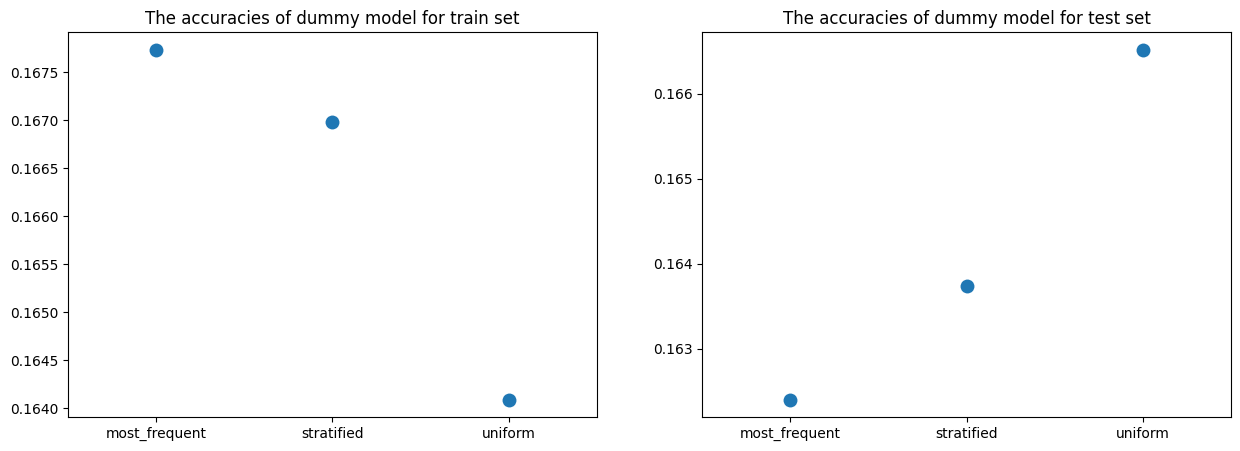

In [55]:
f, axes = plt.subplots(1,2, figsize = (15,5))
sns.stripplot(x=strategies, y=train_dummy_scores,size = 10, ax = axes[0])
axes[0].set_title("The accuracies of dummy model for train set")
sns.stripplot(x=strategies, y=test_dummy_scores,size = 10, ax = axes[1])
axes[1].set_title("The accuracies of dummy model for test set")
plt.show()

# **Models evaluation using different metrics**

In [56]:
knn = KNeighborsClassifier(n_neighbors = 22, weights = 'distance', algorithm = 'ball_tree')
randomForest = RandomForestClassifier(n_estimators=119, max_features='sqrt', max_depth=15, min_samples_split=5, min_samples_leaf=10)
svc = LinearSVC(C=0.13022969239595297)
xgb = XGBClassifier(reg_alpha=0.5, gamma=0.1, n_estimators=95, max_depth=8, learning_rate=0.04989968022036783, subsample=0.6713114776225965, colsample_bytree=0.5096762376471592)
abc = AdaBoostClassifier(n_estimators=160, learning_rate=0.30007391716763326)
classifiers = [knn, svc, xgb, abc, randomForest]
Clf_names = ["knn", "linearSvc", "xgb", "abc", "randomForest"]

In [57]:
tune_train_scores = []
tune_test_scores = []
count = 0
for i in classifiers:
  i.fit(X_train_downsampled, y_train_downsampled)
  y_pred_train_tune = i.predict(X_train_downsampled)
  y_pred_test_tune = i.predict(X_test_downsampled)
  print(f"The train Accuracy for {Clf_names[count]} model is:", metrics.accuracy_score(y_true = y_train_downsampled, y_pred = y_pred_train_tune))
  print(f"The test Accuracy for {Clf_names[count]} model is:", metrics.accuracy_score(y_true = y_test_downsampled, y_pred = y_pred_test_tune))
  print()
  tune_train_scores.append(metrics.accuracy_score(y_true = y_train_downsampled, y_pred = y_pred_train_tune))
  tune_test_scores.append(metrics.accuracy_score(y_true = y_test_downsampled, y_pred = y_pred_test_tune))
  count = count+1

The train Accuracy for knn model is: 0.9711399309807414
The test Accuracy for knn model is: 0.4182991985752449

The train Accuracy for linearSvc model is: 0.4482355560503173
The test Accuracy for linearSvc model is: 0.43755565449688333

The train Accuracy for xgb model is: 0.820939552488033
The test Accuracy for xgb model is: 0.4693900267141585

The train Accuracy for abc model is: 0.27332183012356676
The test Accuracy for abc model is: 0.2717052537845058

The train Accuracy for randomForest model is: 0.8441222308805522
The test Accuracy for randomForest model is: 0.44757346393588604



In [58]:
count = 0
for classifier in classifiers:
  prediction = classifier.predict(X_test_downsampled)
  print(f"Classification report for {Clf_names[count]} model is:", classification_report(y_test_downsampled, prediction))
  count = count+1

Classification report for knn model is:               precision    recall  f1-score   support

           0       0.43      0.37      0.40      1459
           1       0.41      0.38      0.40      1492
           2       0.42      0.56      0.48      1490
           3       0.45      0.43      0.44      1531
           4       0.39      0.33      0.36      1552
           5       0.40      0.44      0.42      1460

    accuracy                           0.42      8984
   macro avg       0.42      0.42      0.42      8984
weighted avg       0.42      0.42      0.42      8984

Classification report for linearSvc model is:               precision    recall  f1-score   support

           0       0.43      0.38      0.40      1459
           1       0.40      0.52      0.45      1492
           2       0.47      0.56      0.51      1490
           3       0.45      0.37      0.41      1531
           4       0.45      0.38      0.41      1552
           5       0.43      0.42      0.42   

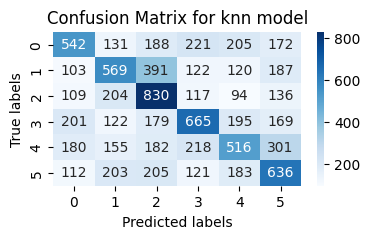

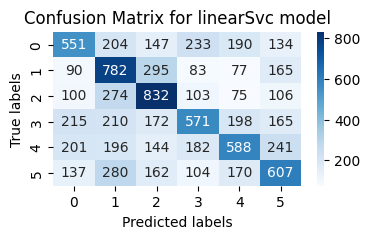

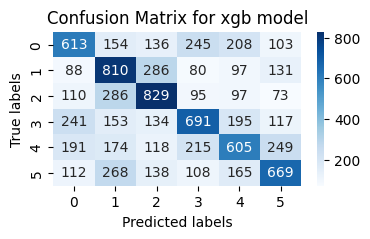

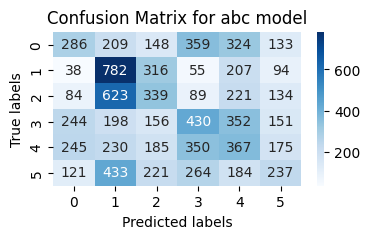

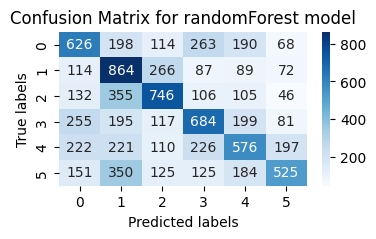

In [59]:
count = 0
for classifier in classifiers:
  if i == svc:
    count = count+1
    continue
  prediction = classifier.predict(X_test_downsampled)
  cm = confusion_matrix(y_test_downsampled, prediction)
  plt.figure(figsize=(4, 2))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title(f"Confusion Matrix for {Clf_names[count]} model")
  plt.show()
  count = count+1

# Implement CNN using self embedding

In [60]:
# Parameters
vocab_size = 10000
embedding_dim = 100
max_length = 100
trunc_type = 'post'
padding_type = 'post'

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=vocab_size, oov_token='')
tokenizer.fit_on_texts(df_downsampled['text'])
sequences = tokenizer.texts_to_sequences(df_downsampled['text'])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Split data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df_downsampled['label'], test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')


Epoch 1/20
1123/1123 - 50s - 45ms/step - accuracy: 0.8285 - loss: 0.4463 - val_accuracy: 0.9348 - val_loss: 0.1806
Epoch 2/20
1123/1123 - 80s - 71ms/step - accuracy: 0.9450 - loss: 0.1384 - val_accuracy: 0.9273 - val_loss: 0.1876
Epoch 3/20
1123/1123 - 82s - 73ms/step - accuracy: 0.9591 - loss: 0.1035 - val_accuracy: 0.9223 - val_loss: 0.2062
Epoch 4/20
1123/1123 - 83s - 74ms/step - accuracy: 0.9684 - loss: 0.0788 - val_accuracy: 0.9101 - val_loss: 0.2363
Epoch 5/20
1123/1123 - 81s - 72ms/step - accuracy: 0.9761 - loss: 0.0638 - val_accuracy: 0.9116 - val_loss: 0.2471
Epoch 6/20
1123/1123 - 82s - 73ms/step - accuracy: 0.9781 - loss: 0.0574 - val_accuracy: 0.9117 - val_loss: 0.2737
Epoch 7/20
1123/1123 - 82s - 73ms/step - accuracy: 0.9811 - loss: 0.0486 - val_accuracy: 0.9010 - val_loss: 0.3235
Epoch 8/20
1123/1123 - 81s - 72ms/step - accuracy: 0.9818 - loss: 0.0451 - val_accuracy: 0.9137 - val_loss: 0.3112
Epoch 9/20
1123/1123 - 82s - 73ms/step - accuracy: 0.9834 - loss: 0.0401 - val_a

# Comparing with existing methods (people in kaggle that also tried this dataset)

In [61]:
# Mapping emotions to sentiment labels
emotion_to_sentiment_3labels = {
    0: 0,  # sadness -> negative sentiment
    1: 1,  # joy/love -> neutral sentiment
    2: 1,
    3: 0,  # anger -> negative sentiment
    4: 2,  # fear/surprise -> positive sentiment
    5: 2   # fear/surprise -> positive sentiment
}

df_compare = df_downsampled_preprocessed.copy()
# Map the labels in the DataFrame
df_compare['label'] = df_compare['label'].map(emotion_to_sentiment_3labels)

# Display the updated DataFrame
df_compare.head()

,Unnamed: 0,text,label,text_length,sentiment,tokenized_text,text_no_stopwords,stemmed_text,text_embedding,sentence_stemmed_text
0,84526,i feel shaken up and torn down,2,30,-0.155556,"[i, feel, shaken, up, and, torn, down]","[shaken, torn]","[shaken, torn]","[-0.533135, 0.509355, 0.160105, -0.267755, -0....","shaken,torn"
1,227655,on reperbahn,0,12,0.000000,"[on, reperbahn]",[reperbahn],[reperbahn],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",reperbahn
2,339603,i feel insulted that he doesnt know me better ...,0,55,0.500000,"[i, feel, insulted, that, he, doesnt, know, me...","[insulted, doesnt, better]","[insult, doesnt, better]","[-0.14870433333333333, 0.30715000000000003, 0....","insult,doesnt,better"
3,281246,i imagine that my fellow liberals get the same...,0,150,0.183333,"[i, imagine, that, my, fellow, liberals, get, ...","[imagine, fellow, liberals, warm, feelings, re...","[imagin, fellow, liber, warm, feel, read, mess...","[-0.20008642857142855, 0.3273742857142857, 0.1...","imagin,fellow,liber,warm,feel,read,messag,cons..."
4,192230,i dont know why im writing it here and not tel...,0,131,0.000000,"[i, dont, know, why, im, writing, it, here, an...","[dont, writing, telling, bet, theyre, totally,...","[dont, write, tell, bet, theyr, total, unawar,...","[-0.027195619999999997, 0.16288940000000002, 0...","dont,write,tell,bet,theyr,total,unawar,dissatisfi"


In [62]:
X_train_comapre, X_test_compare, y_train_compare, y_test_compare = split_data(df_compare)

In [63]:
tune_train_scores = []
tune_test_scores = []
count = 0
for i in classifiers:
  i.fit(X_train_comapre, y_train_compare)
  y_pred_train_tune = i.predict(X_train_comapre)
  y_pred_test_tune = i.predict(X_test_compare)
  print(f"The train Accuracy for {Clf_names[count]} model is:", metrics.accuracy_score(y_true = y_train_compare, y_pred = y_pred_train_tune))
  print(f"The test Accuracy for {Clf_names[count]} model is:", metrics.accuracy_score(y_true = y_test_compare, y_pred = y_pred_test_tune))
  print()
  tune_train_scores.append(metrics.accuracy_score(y_true = y_train_compare, y_pred = y_pred_train_tune))
  tune_test_scores.append(metrics.accuracy_score(y_true = y_test_compare, y_pred = y_pred_test_tune))
  count = count+1

The train Accuracy for knn model is: 0.9843315150840476
The test Accuracy for knn model is: 0.5894924309884239

The train Accuracy for linearSvc model is: 0.6039185127462986
The test Accuracy for linearSvc model is: 0.5977292965271594

The train Accuracy for xgb model is: 0.8409495714126684
The test Accuracy for xgb model is: 0.6380231522707035

The train Accuracy for abc model is: 0.5001669820772571
The test Accuracy for abc model is: 0.5

The train Accuracy for randomForest model is: 0.8812757430702438
The test Accuracy for randomForest model is: 0.6182101513802315



# Trying different techniques for embedding

In [64]:
stemer = PorterStemmer()
stp_words = stopwords.words("english")
def preprocess(text):
    preprocessed_txt = ""
    tokens = word_tokenize(text)
    for token in tokens:
        if token not in stp_words :
            lower_token = token.lower()
            stemed_token = stemer.stem(lower_token)
            preprocessed_txt += stemed_token + " "
    else:
        preprocessed_txt = preprocessed_txt[:-1]
    return preprocessed_txt

Number of data for each class is: 7486


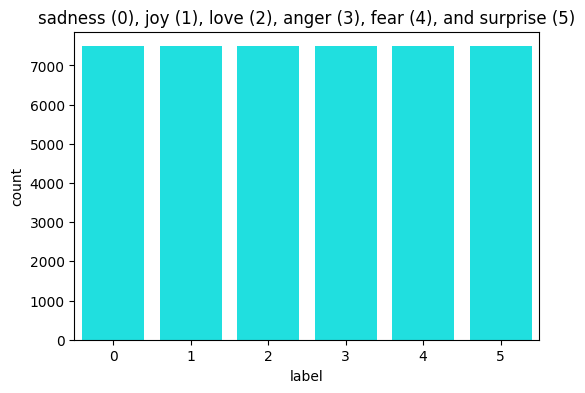

,Unnamed: 0,text,label
0,84526,i feel shaken up and torn down,4
1,227655,on reperbahn,3
2,339603,i feel insulted that he doesnt know me better ...,3
3,281246,i imagine that my fellow liberals get the same...,3
4,192230,i dont know why im writing it here and not tel...,3


In [65]:
# Now we will apply undersampling to the majority class to match class 5

# Separate the dataset by class
df_0 = original_df[original_df['label'] == 0]
df_1 = original_df[original_df['label'] == 1]
df_2 = original_df[original_df['label'] == 2]
df_3 = original_df[original_df['label'] == 3]
df_4 = original_df[original_df['label'] == 4]
df_5 = original_df[original_df['label'] == 5]

# Saving the amount of data in label 5
n_samples_label_5 = round(len(df_5) / 2)

# Downsample the majority classes to n_samples_label_5 samples
# The random_state variable act like a seed.
# Setting random_state=42 helps in making your code reproducible and ensures that the results are consistent across different runs.
df_0_downsampled = resample(df_0, replace=False, n_samples=n_samples_label_5, random_state=42)
df_1_downsampled = resample(df_1, replace=False, n_samples=n_samples_label_5, random_state=42)
df_2_downsampled = resample(df_2, replace=False, n_samples=n_samples_label_5, random_state=42)
df_3_downsampled = resample(df_3, replace=False, n_samples=n_samples_label_5, random_state=42)
df_4_downsampled = resample(df_4, replace=False, n_samples=n_samples_label_5, random_state=42)
df_5_downsampled = resample(df_5, replace=False, n_samples=n_samples_label_5, random_state=42)

# Combine the downsampled data with the minority class data along the y-axis
df_downsampled_second = pd.concat([df_1_downsampled, df_0_downsampled, df_3_downsampled, df_4_downsampled, df_2_downsampled, df_5_downsampled])

# Shuffle the combined dataset
df_downsampled_second = df_downsampled_second.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Number of data for each class is: {n_samples_label_5}")
classes_plot(df_downsampled_second)
df_downsampled_second.head()

In [66]:

df_downsampled_second.head()

,Unnamed: 0,text,label
0,84526,i feel shaken up and torn down,4
1,227655,on reperbahn,3
2,339603,i feel insulted that he doesnt know me better ...,3
3,281246,i imagine that my fellow liberals get the same...,3
4,192230,i dont know why im writing it here and not tel...,3


In [67]:
df_downsampled_second['text'] = df_downsampled_second['text'].apply(preprocess)

In [68]:
count_vectorizer = CountVectorizer(binary=True, stop_words='english')
X = count_vectorizer.fit_transform(df_downsampled_second['text'])

In [69]:
features = count_vectorizer.get_feature_names_out()


In [70]:
y = df_downsampled_second['label']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [72]:
knn = KNeighborsClassifier(n_neighbors = 22, weights = 'distance', algorithm = 'ball_tree')
randomForest = RandomForestClassifier(n_estimators=119, max_features='sqrt', max_depth=15, min_samples_split=5, min_samples_leaf=10)
svc = LinearSVC(C=0.13022969239595297)
xgb = XGBClassifier(reg_lambda=1.0, reg_alpha=0.5, gamma=0.1, n_estimators=95, max_depth=8, learning_rate=0.04989968022036783, subsample=0.6713114776225965, colsample_bytree=0.5096762376471592)
abc = AdaBoostClassifier(n_estimators=160, learning_rate=0.30007391716763326)
classifiers = [knn, svc, xgb, abc, randomForest]
Clf_names = ["knn", "linearSvc", "xgb", "abc", "randomForest"]

In [73]:
tune_train_scores = []
tune_test_scores = []
count = 0
for i in classifiers:
  i.fit(X_train, y_train)
  y_pred_train_tune = i.predict(X_train)
  y_pred_test_tune = i.predict(X_test)
  print(f"The train Accuracy for {Clf_names[count]} model is:", metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train_tune))
  print(f"The test Accuracy for {Clf_names[count]} model is:", metrics.accuracy_score(y_true = y_test, y_pred = y_pred_test_tune))
  print()
  tune_train_scores.append(metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train_tune))
  tune_test_scores.append(metrics.accuracy_score(y_true = y_test, y_pred = y_pred_test_tune))
  count = count+1


The train Accuracy for knn model is: 0.9902038739225851
The test Accuracy for knn model is: 0.7479035250463821

The train Accuracy for linearSvc model is: 0.9425272733055564
The test Accuracy for linearSvc model is: 0.8826716141001856

The train Accuracy for xgb model is: 0.8644763207277122
The test Accuracy for xgb model is: 0.8560296846011132

The train Accuracy for abc model is: 0.25199580166025254
The test Accuracy for abc model is: 0.24794063079777365

The train Accuracy for randomForest model is: 0.8615502051461468
The test Accuracy for randomForest model is: 0.8587012987012987



# Tranformer work

In [2]:
!pip install --upgrade transformers


In [1]:
import transformers
print(transformers.__version__)


4.54.0


In [2]:
from datasets import Dataset
from sklearn.model_selection import train_test_split

# נשתמש בדאטה המקורי או מאוזן (לפי מה שאתה רוצה לבדוק)
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df_downsampled['text'].tolist(),
    df_downsampled['label'].tolist(),
    test_size=0.2,
    stratify=df_downsampled['label'],
    random_state=42
)

# יצירת אובייקט של HuggingFace datasets
train_dataset = Dataset.from_dict({'text': train_texts, 'label': train_labels})
test_dataset = Dataset.from_dict({'text': test_texts, 'label': test_labels})


NameError: name 'df_downsampled' is not defined

In [76]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize(example):
    return tokenizer(example['text'], truncation=True, padding='max_length', max_length=128)

train_dataset = train_dataset.map(tokenize, batched=True)
test_dataset = test_dataset.map(tokenize, batched=True)

train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/35932 [00:00<?, ? examples/s]

Map:   0%|          | 0/8984 [00:00<?, ? examples/s]

In [77]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=6)

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    load_best_model_at_end=True,
    metric_for_best_model='accuracy'
)

from sklearn.metrics import accuracy_score, classification_report

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=1)
    return {"accuracy": accuracy_score(labels, predictions)}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

trainer.train()


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'evaluation_strategy'

In [ ]:
eval_results = trainer.evaluate()
print("BERT Test Accuracy:", eval_results['eval_accuracy'])

# תחזיות ודוח סיווג
preds = trainer.predict(test_dataset)
y_pred = preds.predictions.argmax(axis=1)
print(classification_report(test_labels, y_pred))


In [1]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    load_best_model_at_end=True,
    metric_for_best_model='accuracy'
)


TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'evaluation_strategy'